# Data Understanding

## Import Libraries

In [234]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
import pycountry_convert as pc
from IPython.display import Image
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

## Data Loading

Dataset: [Hotel booking demand](https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand/data)

URL dataset: [Github](https://raw.githubusercontent.com/eru2024/laskarai-mlt-predictiveanalytics/refs/heads/main/dataset/hotel_bookings.csv)

In [235]:
# Load dataset from personal github repository
url = 'https://raw.githubusercontent.com/eru2024/laskarai-mlt-predictiveanalytics/refs/heads/main/dataset/hotel_bookings.csv'
hotel_bookings = pd.read_csv(url)
hotel_bookings.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02


## Dataset Structure

In [236]:
# Custom function for summarize dataset structure
def get_dataframe_summary(dfs):
  summary_data = []

  for df_name, df in dfs.items():
    if not isinstance(df, pd.DataFrame):
      print(f"Warning: {df_name} is not a pandas DataFrame. Skipping.")
      continue

    for col_name in df.columns:
      summary_data.append({
          'DataFrame Name': df_name,
          'Column Name': col_name,
          'dtype': df[col_name].dtype,
          'Minimum Value': df[col_name].min() if pd.api.types.is_numeric_dtype(df[col_name]) else np.nan,
          'Maximum Value': df[col_name].max() if pd.api.types.is_numeric_dtype(df[col_name]) else np.nan,
          'Mean Value': df[col_name].mean() if pd.api.types.is_numeric_dtype(df[col_name]) else np.nan,
          'Median Value': df[col_name].median() if pd.api.types.is_numeric_dtype(df[col_name]) else np.nan,
          'Standard Deviation': df[col_name].std() if pd.api.types.is_numeric_dtype(df[col_name]) else np.nan,
          'Number of Rows': len(df),
          'Number of Missing Values': df[col_name].isnull().sum(),
          'Number of Unique Values': df[col_name].nunique(),
          'Number of Duplicated Values': df.duplicated(subset=[col_name]).sum()
      })

  return pd.DataFrame(summary_data)

In [237]:
# Apply function on avalaible dataframes
dataframes = {'hotel_bookings': hotel_bookings}

summary_dataset = get_dataframe_summary(dataframes)
summary_dataset

,DataFrame Name,Column Name,dtype,Minimum Value,Maximum Value,Mean Value,Median Value,Standard Deviation,Number of Rows,Number of Missing Values,Number of Unique Values,Number of Duplicated Values
0,hotel_bookings,hotel,object,NaN,NaN,NaN,NaN,NaN,119390,0,2,119388
1,hotel_bookings,is_canceled,int64,0.00,1.0,0.370416,0.000,0.482918,119390,0,2,119388
2,hotel_bookings,lead_time,int64,0.00,737.0,104.011416,69.000,106.863097,119390,0,479,118911
3,hotel_bookings,arrival_date_year,int64,2015.00,2017.0,2016.156554,2016.000,0.707476,119390,0,3,119387
4,hotel_bookings,arrival_date_month,object,NaN,NaN,NaN,NaN,NaN,119390,0,12,119378
5,hotel_bookings,arrival_date_week_number,int64,1.00,53.0,27.165173,28.000,13.605138,119390,0,53,119337
6,hotel_bookings,arrival_date_day_of_month,int64,1.00,31.0,15.798241,16.000,8.780829,119390,0,31,119359
7,hotel_bookings,stays_in_weekend_nights,int64,0.00,19.0,0.927599,1.000,0.998613,119390,0,17,119373
8,hotel_bookings,stays_in_week_nights,int64,0.00,50.0,2.500302,2.000,1.908286,119390,0,35,119355
9,hotel_bookings,adults,int64,0.00,55.0,1.856403,2.000,0.579261,119390,0,14,119376


The dataset `hotel_bookings` contains 119,390 rows and 32 columns. Each row represents a single hotel booking. The dataset includes a mix of data types: `int64`, `float64`, and `object` (which represent strings or categorical data).

The presence of various data types indicates that the dataset captures different aspects of a booking, from numerical values like lead time and number of guests to categorical information like hotel type, market segment, and reservation status.

# Exploratory Data Analysis

## Variable Description

Based on the journal article ["Hotel booking demand datasets"](https://doi.org/10.1016/j.dib.2018.11.126) as the dataset original source, there are 32 variables or features with discription below:

1. `hotel`. Categorical, Type of hotel (City Hotel or Resort Hotel)
2. `is_canceled`. Integer, Value indicating if the booking was canceled (1) or not (0)
3. `lead_time`. Integer, Number of days between booking date and arrival date
4. `arrival_date_year`. Integer, Year of arrival date
5. `arrival_date_month`. Categorical, Month of arrival date (January to December)
6. `arrival_date_week_number`. Integer, Week number of arrival date
7. `arrival_date_day_of_month`. Integer, Day of arrival date
8. `stays_in_weekend_nights`. Integer, Number of weekend nights (Saturday or Sunday) the customer stayed or booked to stay at the hotel
9. `stays_in_week_nights`. Integer, Number of week nights (Monday to Friday) the customer stayed or booked to stay at the hotel
10. `adults`. Integer, Number of adults
11. `children`. Integer, Number of children
12. `babies`. Integer, Number of babies
13. `meal`. Categorical, Type of meal booked. Categories are Undefined, BB (Bed & Breakfast), HB (Half Board), FB (Full Board)
14. `country`. Categorical, Country of origin. Categories are represented in the ISO 3166 – 1 alpha-3 format
15. `market_segment`. Categorical, Market segment designation. In categories such as Online TA, Offline TA/TO, Groups, Corporate, Complementary, Aviation
16. `distribution_channel`. Categorical, Booking distribution channel. Categories are Corporate, GDS, TA/TO, Direct, Undefined
17. `is_repeated_guest`. Integer, Value indicating if the booking person is a repeated guest (1) or not (0)
18. `previous_cancellations`. Integer, Number of previous bookings that were canceled by the customer prior to the current booking
19. `previous_bookings_not_canceled`. Integer, Number of previous bookings that were not canceled by the customer prior to the current booking
20. `reserved_room_type`. Categorical, Code of room type reserved. Codes are for illustration purposes only.
21. `assigned_room_type`. Categorical, Code of room type assigned. Codes are for illustration purposes only.
22. `booking_changes`. Integer, Number of changes/amendments made to the booking from the moment it was entered on the PMS until the moment of check-in or cancellation
23. `deposit_type`. Categorical, Indication on if the customer made a deposit to guarantee the booking. Categories are No Deposit, Non Refund, Refundable
24. `agent`. Categorical, ID of the travel agency that made the booking
25. `company`. Categorical, ID of the company/entity that made the booking or responsible for paying the booking
26. `days_in_waiting_list`. Integer, Number of days the booking was in the waiting list before it was confirmed to the customer
27. `customer_type`. Categorical, Type of customer, assuming one of four categories: Contract, Group, Transient, Transient-Party
28. `adr`. Numeric, Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights
29. `required_car_parking_spaces`. Integer, Number of required car parking spaces
30. `total_of_special_requests`. Integer, Number of special requests made by the customer (e.g. twin bed or high floor)
31. `reservation_status`. Categorical, Reservation status (Canceled, Check-Out, No-Show)
32. `reservation_status_date`. Date, Date at which the last status was set. This variable can be used in conjunction with the `is_canceled` variable to understand when a booking was really canceled.

In [238]:
hotel_bookings['reservation_status_date'] = pd.to_datetime(hotel_bookings['reservation_status_date'])

## Missing Value Handling

In [239]:
hotel_bookings_clean = hotel_bookings.copy()

The dataset structure shows missing values in several columns: `children` (4), `country` (488), `agent` (16340), and `company` (112593).

* `children`: The small number of missing values here suggests that simply removing the rows with missing values might be a viable option, as it would have minimal impact on the overall dataset size.

  Handling: **rows removal**

* `country`: 488 missing values is a relatively small number compared to the total rows. Thus, removal of these rows is an appropriate option.

  Handling: **rows removal**

* `agent` and `company`: These columns have a very large number of missing values. The company column, with over 112,000 missing values out of 119,390 rows, is almost entirely empty. These columns are suitable for removal from the analysis.

  Handling: **columns removal**

In [240]:
# Remove rows with empty values in 'children' and 'country' columns
hotel_bookings_clean = hotel_bookings_clean.dropna(subset=['children', 'country'])

# Remove column agent and company
hotel_bookings_clean = hotel_bookings_clean.drop(['agent', 'company'], axis=1)

## Outliers Handling

The minimum and maximum values reveal potential outliers in several numerical columns namely `adr`, `adults`, `children`, `babies`.

### `adr` with negative value and highest value

`adr`: The minimum value of -6.38 and a maximum value of 5400.0 are highly suspicious. A negative ADR is likely an error and should be investigated or removed. An ADR of 5400.0 seems unusually high and could be an outlier that skews statistical analysis and impacts model training.

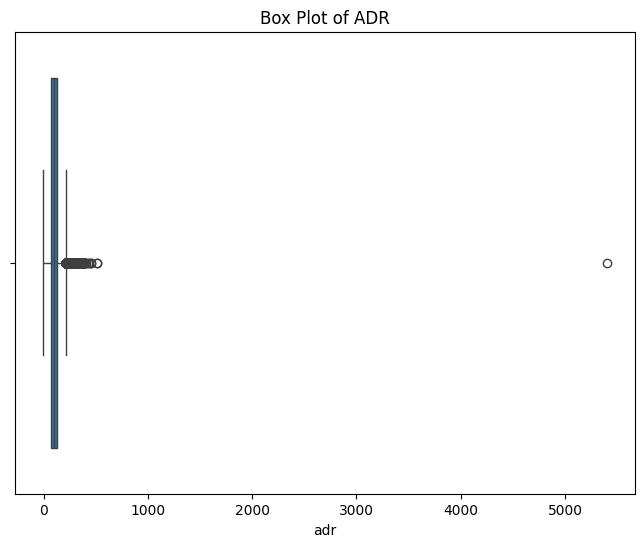

In [241]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=hotel_bookings_clean['adr'])
plt.title('Box Plot of ADR')
plt.show()

The box plot illustrates that the `adr` distribution is heavily skewed to the right, with many bookings having a relatively low ADR, but a significant number of bookings with much higher rates, appearing as outliers. The negative ADR value(s) are also highlighted as extreme outliers.

In [242]:
hotel_bookings_clean[hotel_bookings_clean['adr'] < 0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
14969,Resort Hotel,0,195,2017,March,10,5,4,6,2,...,H,2,No Deposit,0,Transient-Party,-6.38,0,0,Check-Out,2017-03-15


In [243]:
hotel_bookings_clean.nlargest(10, 'adr')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
48515,City Hotel,1,35,2016,March,13,25,0,1,2,...,A,1,Non Refund,0,Transient,5400.00,0,0,Canceled,2016-02-19
111403,City Hotel,0,0,2017,May,19,9,0,1,1,...,G,0,No Deposit,0,Transient,510.00,0,0,Check-Out,2017-05-10
15083,Resort Hotel,0,1,2015,July,29,15,0,1,2,...,C,0,No Deposit,0,Transient,508.00,1,0,Check-Out,2015-07-16
103912,City Hotel,0,81,2016,December,53,31,1,1,2,...,E,1,No Deposit,0,Transient-Party,451.50,0,4,Check-Out,2017-01-02
13142,Resort Hotel,1,378,2017,August,31,1,4,10,2,...,A,0,No Deposit,0,Transient,450.00,0,0,Canceled,2016-07-22
13391,Resort Hotel,1,59,2017,August,33,13,2,4,2,...,H,1,No Deposit,0,Transient,437.00,0,0,Canceled,2017-08-03
39155,Resort Hotel,0,31,2017,August,31,1,2,6,2,...,G,0,No Deposit,0,Transient,426.25,0,2,Check-Out,2017-08-09
39568,Resort Hotel,0,104,2017,August,33,17,2,3,3,...,H,2,No Deposit,0,Transient,402.00,0,1,Check-Out,2017-08-22
39118,Resort Hotel,0,26,2017,July,31,31,3,5,3,...,H,1,No Deposit,0,Transient,397.38,0,1,Check-Out,2017-08-08
13323,Resort Hotel,1,116,2017,August,32,9,2,8,2,...,F,3,No Deposit,0,Transient,392.00,0,0,Canceled,2017-04-17


`adr` outliers handling:

*   Removal: remove rows with negative ADR because The presence of negative adr values is highly likely to be a data error.
*   Winsorizing: replace highest row (ADR = 5400.00) with the nearest non-outlier value. This reduces the influence of extremes without removing the data points entirely.

In [244]:
hotel_bookings_clean = hotel_bookings_clean[hotel_bookings_clean['adr'] >= 0]

In [245]:
# Find the second highest ADR value
second_highest_adr = hotel_bookings_clean['adr'].nlargest(2).iloc[-1]

# Find the index of the row with the highest ADR value
highest_adr_index = hotel_bookings_clean['adr'].idxmax()

# Replace the highest ADR value with the second highest ADR value
hotel_bookings_clean.loc[highest_adr_index, 'adr'] = second_highest_adr

hotel_bookings_clean.nlargest(10, 'adr')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
48515,City Hotel,1,35,2016,March,13,25,0,1,2,...,A,1,Non Refund,0,Transient,510.00,0,0,Canceled,2016-02-19
111403,City Hotel,0,0,2017,May,19,9,0,1,1,...,G,0,No Deposit,0,Transient,510.00,0,0,Check-Out,2017-05-10
15083,Resort Hotel,0,1,2015,July,29,15,0,1,2,...,C,0,No Deposit,0,Transient,508.00,1,0,Check-Out,2015-07-16
103912,City Hotel,0,81,2016,December,53,31,1,1,2,...,E,1,No Deposit,0,Transient-Party,451.50,0,4,Check-Out,2017-01-02
13142,Resort Hotel,1,378,2017,August,31,1,4,10,2,...,A,0,No Deposit,0,Transient,450.00,0,0,Canceled,2016-07-22
13391,Resort Hotel,1,59,2017,August,33,13,2,4,2,...,H,1,No Deposit,0,Transient,437.00,0,0,Canceled,2017-08-03
39155,Resort Hotel,0,31,2017,August,31,1,2,6,2,...,G,0,No Deposit,0,Transient,426.25,0,2,Check-Out,2017-08-09
39568,Resort Hotel,0,104,2017,August,33,17,2,3,3,...,H,2,No Deposit,0,Transient,402.00,0,1,Check-Out,2017-08-22
39118,Resort Hotel,0,26,2017,July,31,31,3,5,3,...,H,1,No Deposit,0,Transient,397.38,0,1,Check-Out,2017-08-08
13323,Resort Hotel,1,116,2017,August,32,9,2,8,2,...,F,3,No Deposit,0,Transient,392.00,0,0,Canceled,2017-04-17


`adults`, `children`, `babies`: Maximum values like 55, 10, and 10 seem unusually high for the number of occupants in typical hotel rooms and could represent outliers or data entry errors.

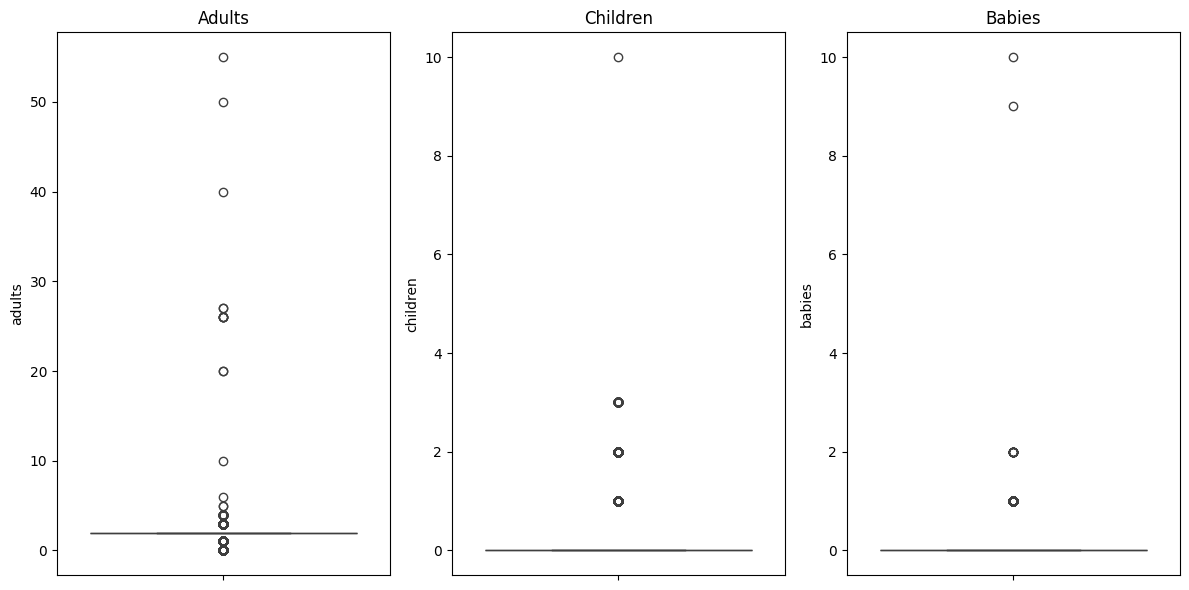

In [246]:
# Create the box plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.boxplot(y=hotel_bookings_clean['adults'])
plt.title('Adults')

plt.subplot(1, 3, 2)
sns.boxplot(y=hotel_bookings_clean['children'])
plt.title('Children')

plt.subplot(1, 3, 3)
sns.boxplot(y=hotel_bookings_clean['babies'])
plt.title('Babies')

plt.tight_layout()
plt.show()

### zero `adults`

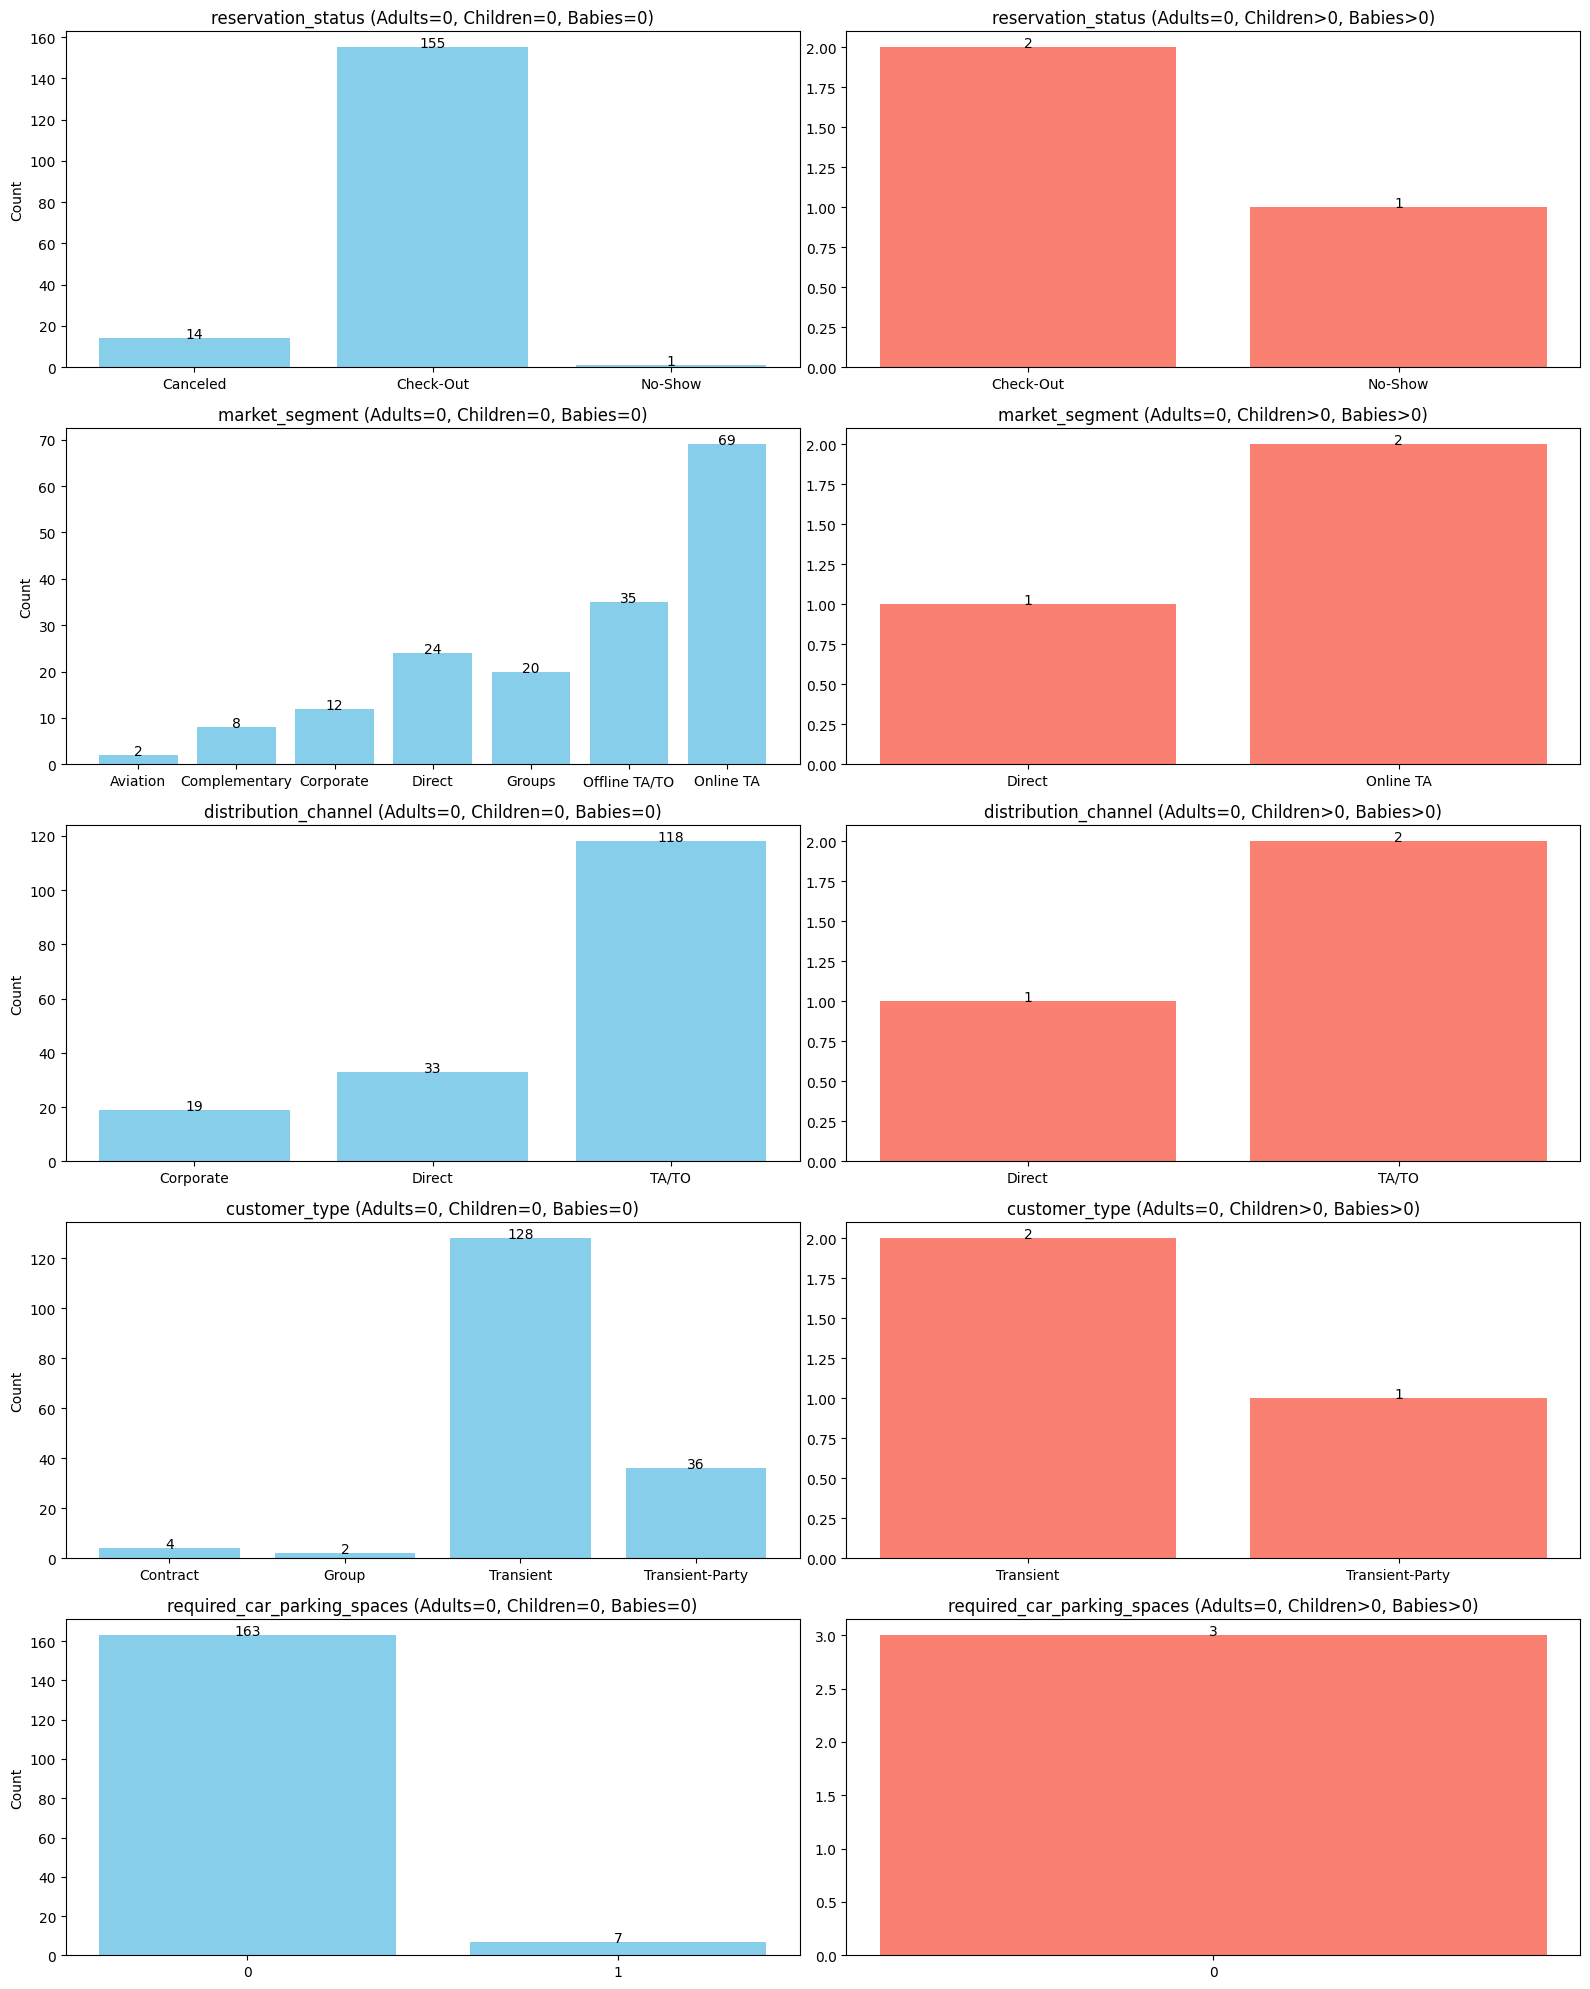

In [247]:
# Filtering cases
filter1 = hotel_bookings_clean[(hotel_bookings_clean['adults'] == 0) &
                               (hotel_bookings_clean['children'] == 0) &
                               (hotel_bookings_clean['babies'] == 0)]

filter2 = hotel_bookings_clean[(hotel_bookings_clean['adults'] == 0) &
                               (hotel_bookings_clean['children'] > 0) &
                               (hotel_bookings_clean['babies'] > 0)]

# Columns to visualize
columns_to_plot = [
    'reservation_status',
    'market_segment',
    'distribution_channel',
    'customer_type',
    'required_car_parking_spaces'
]

# Create subplots
fig, axes = plt.subplots(len(columns_to_plot), 2, figsize=(16, 20))
fig.subplots_adjust(hspace=0.5)

# Generate bar charts
for idx, col in enumerate(columns_to_plot):
    # First column (filter1)
    counts1 = filter1[col].value_counts().sort_index()
    axes[idx, 0].bar(counts1.index.astype(str), counts1.values, color='skyblue')
    axes[idx, 0].set_title(f'{col} (Adults=0, Children=0, Babies=0)')
    axes[idx, 0].set_ylabel('Count')
    for i, v in enumerate(counts1.values):
        axes[idx, 0].text(i, v, str(v), ha='center')

    # Second column (filter2)
    counts2 = filter2[col].value_counts().sort_index()
    axes[idx, 1].bar(counts2.index.astype(str), counts2.values, color='salmon')
    axes[idx, 1].set_title(f'{col} (Adults=0, Children>0, Babies>0)')
    for i, v in enumerate(counts2.values):
        axes[idx, 1].text(i, v, str(v), ha='center')

plt.tight_layout()
plt.show()

**Case 1** (Adults=0, Children=0, Babies=0)
* **Unrealistic combinations**: No guests at all, yet shows completed check-outs and some parking spots.
* **Possible Causes**: These appear to be test, placeholder, or system-error entries.

**Case 2** (Adults=0, Children>0, Babies>0)
* Just 3 bookings with 2 “Check-Out” and 1 “No-Show”.
* **Possible Causes**: Data-entry mistakes (adult count missed) or Edge cases (school/child-only booking with adult info lost).

**Handling**: Remove rows with `total_guests` = `adults` + `children` + `babies` == 0

In [248]:
# Create the 'total_guests' column
hotel_bookings_clean['total_guests'] = (
    hotel_bookings_clean['adults'] +
    hotel_bookings_clean['children'] +
    hotel_bookings_clean['babies']
)

# Remove rows where total_guests == 0
hotel_bookings_clean = hotel_bookings_clean[hotel_bookings_clean['total_guests'] > 0]

### high numbers of `adults`

In [249]:
# Calculate statistics
mean_adults = hotel_bookings_clean['adults'].mean()
median_adults = hotel_bookings_clean['adults'].median()
percentiles_adults = hotel_bookings_clean['adults'].quantile([0.01, 0.05, 0.10, 0.25, 0.5, 0.75, 0.90, 0.95, 0.99])

# Display results
print(f"Mean number of adults: {mean_adults:.2f}")
print(f"Median number of adults: {median_adults}")
print("\nPercentiles of adults:")
print(percentiles_adults)

Mean number of adults: 1.86
Median number of adults: 2.0

Percentiles of adults:
0.01    1.0
0.05    1.0
0.10    1.0
0.25    2.0
0.50    2.0
0.75    2.0
0.90    2.0
0.95    3.0
0.99    3.0
Name: adults, dtype: float64


Descriptive statistics shows:
* The mean and median number of adults are low (1.86 and 2.0 respectively), indicating that most bookings are for a small number of adults.
* The percentiles reinforce this, showing that 75% of bookings have 2 adults, and even the 99th percentile is only 3 adults. This means bookings with 4 or more adults are relatively rare occurrences (outliers), falling into the top 1% of the data distribution.

In [250]:
# Calculate the number of bookings in each category
adults_lt_4 = len(hotel_bookings_clean[hotel_bookings_clean['adults'] < 4])
adults_4_10 = len(hotel_bookings_clean[(hotel_bookings_clean['adults'] >= 4) & (hotel_bookings_clean['adults'] <= 10)])
adults_11_20 = len(hotel_bookings_clean[(hotel_bookings_clean['adults'] > 10) & (hotel_bookings_clean['adults'] <= 20)])
adults_21_30 = len(hotel_bookings_clean[(hotel_bookings_clean['adults'] > 20) & (hotel_bookings_clean['adults'] <= 30)])
adults_31_40 = len(hotel_bookings_clean[(hotel_bookings_clean['adults'] > 30) & (hotel_bookings_clean['adults'] <= 40)])
adults_41_50 = len(hotel_bookings_clean[(hotel_bookings_clean['adults'] > 40) & (hotel_bookings_clean['adults'] <= 50)])
adults_gt_50 = len(hotel_bookings_clean[hotel_bookings_clean['adults'] > 50])

total_bookings = len(hotel_bookings_clean)

# Calculate the percentages
percentage_lt_4 = (adults_lt_4 / total_bookings) * 100
percentage_4_10 = (adults_4_10 / total_bookings) * 100
percentage_11_20 = (adults_11_20 / total_bookings) * 100
percentage_21_30 = (adults_21_30 / total_bookings) * 100
percentage_31_40 = (adults_31_40 / total_bookings) * 100
percentage_41_50 = (adults_41_50 / total_bookings) * 100
percentage_gt_50 = (adults_gt_50 / total_bookings) * 100

# Print the results
print("Number of Bookings and Percentages:")
print(f"- Adults < 4: {adults_lt_4} ({percentage_lt_4:.5f}%)")
print(f"- Adults >= 4 and <= 10: {adults_4_10} ({percentage_4_10:.5f}%)")
print(f"- Adults > 10 and <= 20: {adults_11_20} ({percentage_11_20:.5f}%)")
print(f"- Adults > 20 and <= 30: {adults_21_30} ({percentage_21_30:.5f}%)")
print(f"- Adults > 30 and <= 40: {adults_31_40} ({percentage_31_40:.5f}%)")
print(f"- Adults > 40 and <= 50: {adults_41_50} ({percentage_41_50:.5f}%)")
print(f"- Adults > 50: {adults_gt_50} ({percentage_gt_50:.5f}%)")


Number of Bookings and Percentages:
- Adults < 4: 118649 (99.93430%)
- Adults >= 4 and <= 10: 66 (0.05559%)
- Adults > 10 and <= 20: 2 (0.00168%)
- Adults > 20 and <= 30: 7 (0.00590%)
- Adults > 30 and <= 40: 1 (0.00084%)
- Adults > 40 and <= 50: 1 (0.00084%)
- Adults > 50: 1 (0.00084%)


**Handling**:
* Remove bookings with adults > 10 due to rare occurences
* Keep bookings with adults from 4 to 10 to consider a higher numbers of adults without being overly sensitive to the exact, infrequent high counts

In [251]:
hotel_bookings_clean = hotel_bookings_clean[hotel_bookings_clean['adults'] <= 10]

## Univariate Analysis

Identifies feature types in the dataset based on data type

In [252]:
# Identify feature types
time_features = hotel_bookings_clean.select_dtypes(include=['datetime64']).columns.tolist()
numerical_features = hotel_bookings_clean.select_dtypes(include=np.number).columns.tolist()
categorical_features = hotel_bookings_clean.select_dtypes(include='object').columns.tolist()
categorical_features = [feature for feature in categorical_features if feature != 'country']
geolocation_features = ['country']

print(f"Numerical Features ({len(numerical_features)}): {numerical_features}")
print(f"Categorical Features ({len(categorical_features)}): {categorical_features}")
print(f"Geolocation Features ({len(geolocation_features)}): {geolocation_features}")
print(f"Time Features ({len(time_features)}): {time_features}")

Numerical Features (19): ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'total_guests']
Categorical Features (10): ['hotel', 'arrival_date_month', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status']
Geolocation Features (1): ['country']
Time Features (1): ['reservation_status_date']


### Categorical Features

In [253]:
for feature in categorical_features:
    count = hotel_bookings_clean[feature].value_counts()
    percent = 100 * hotel_bookings_clean[feature].value_counts(normalize=True)
    df = pd.DataFrame({'Rows': count, '% of Total Rows': percent.round(2)})
    print(f"Feature: {feature}")
    print(df)
    print("\n")

Feature: hotel
               Rows  % of Total Rows
hotel                               
City Hotel    79143            66.67
Resort Hotel  39572            33.33


Feature: arrival_date_month
                     Rows  % of Total Rows
arrival_date_month                        
August              13836            11.65
July                12611            10.62
May                 11768             9.91
October             11078             9.33
April               11038             9.30
June                10917             9.20
September           10451             8.80
March                9712             8.18
February             7997             6.74
November             6731             5.67
December             6710             5.65
January              5866             4.94


Feature: meal
            Rows  % of Total Rows
meal                             
BB         91779            77.31
HB         14426            12.15
SC         10547             8.88
Undefined   1165   

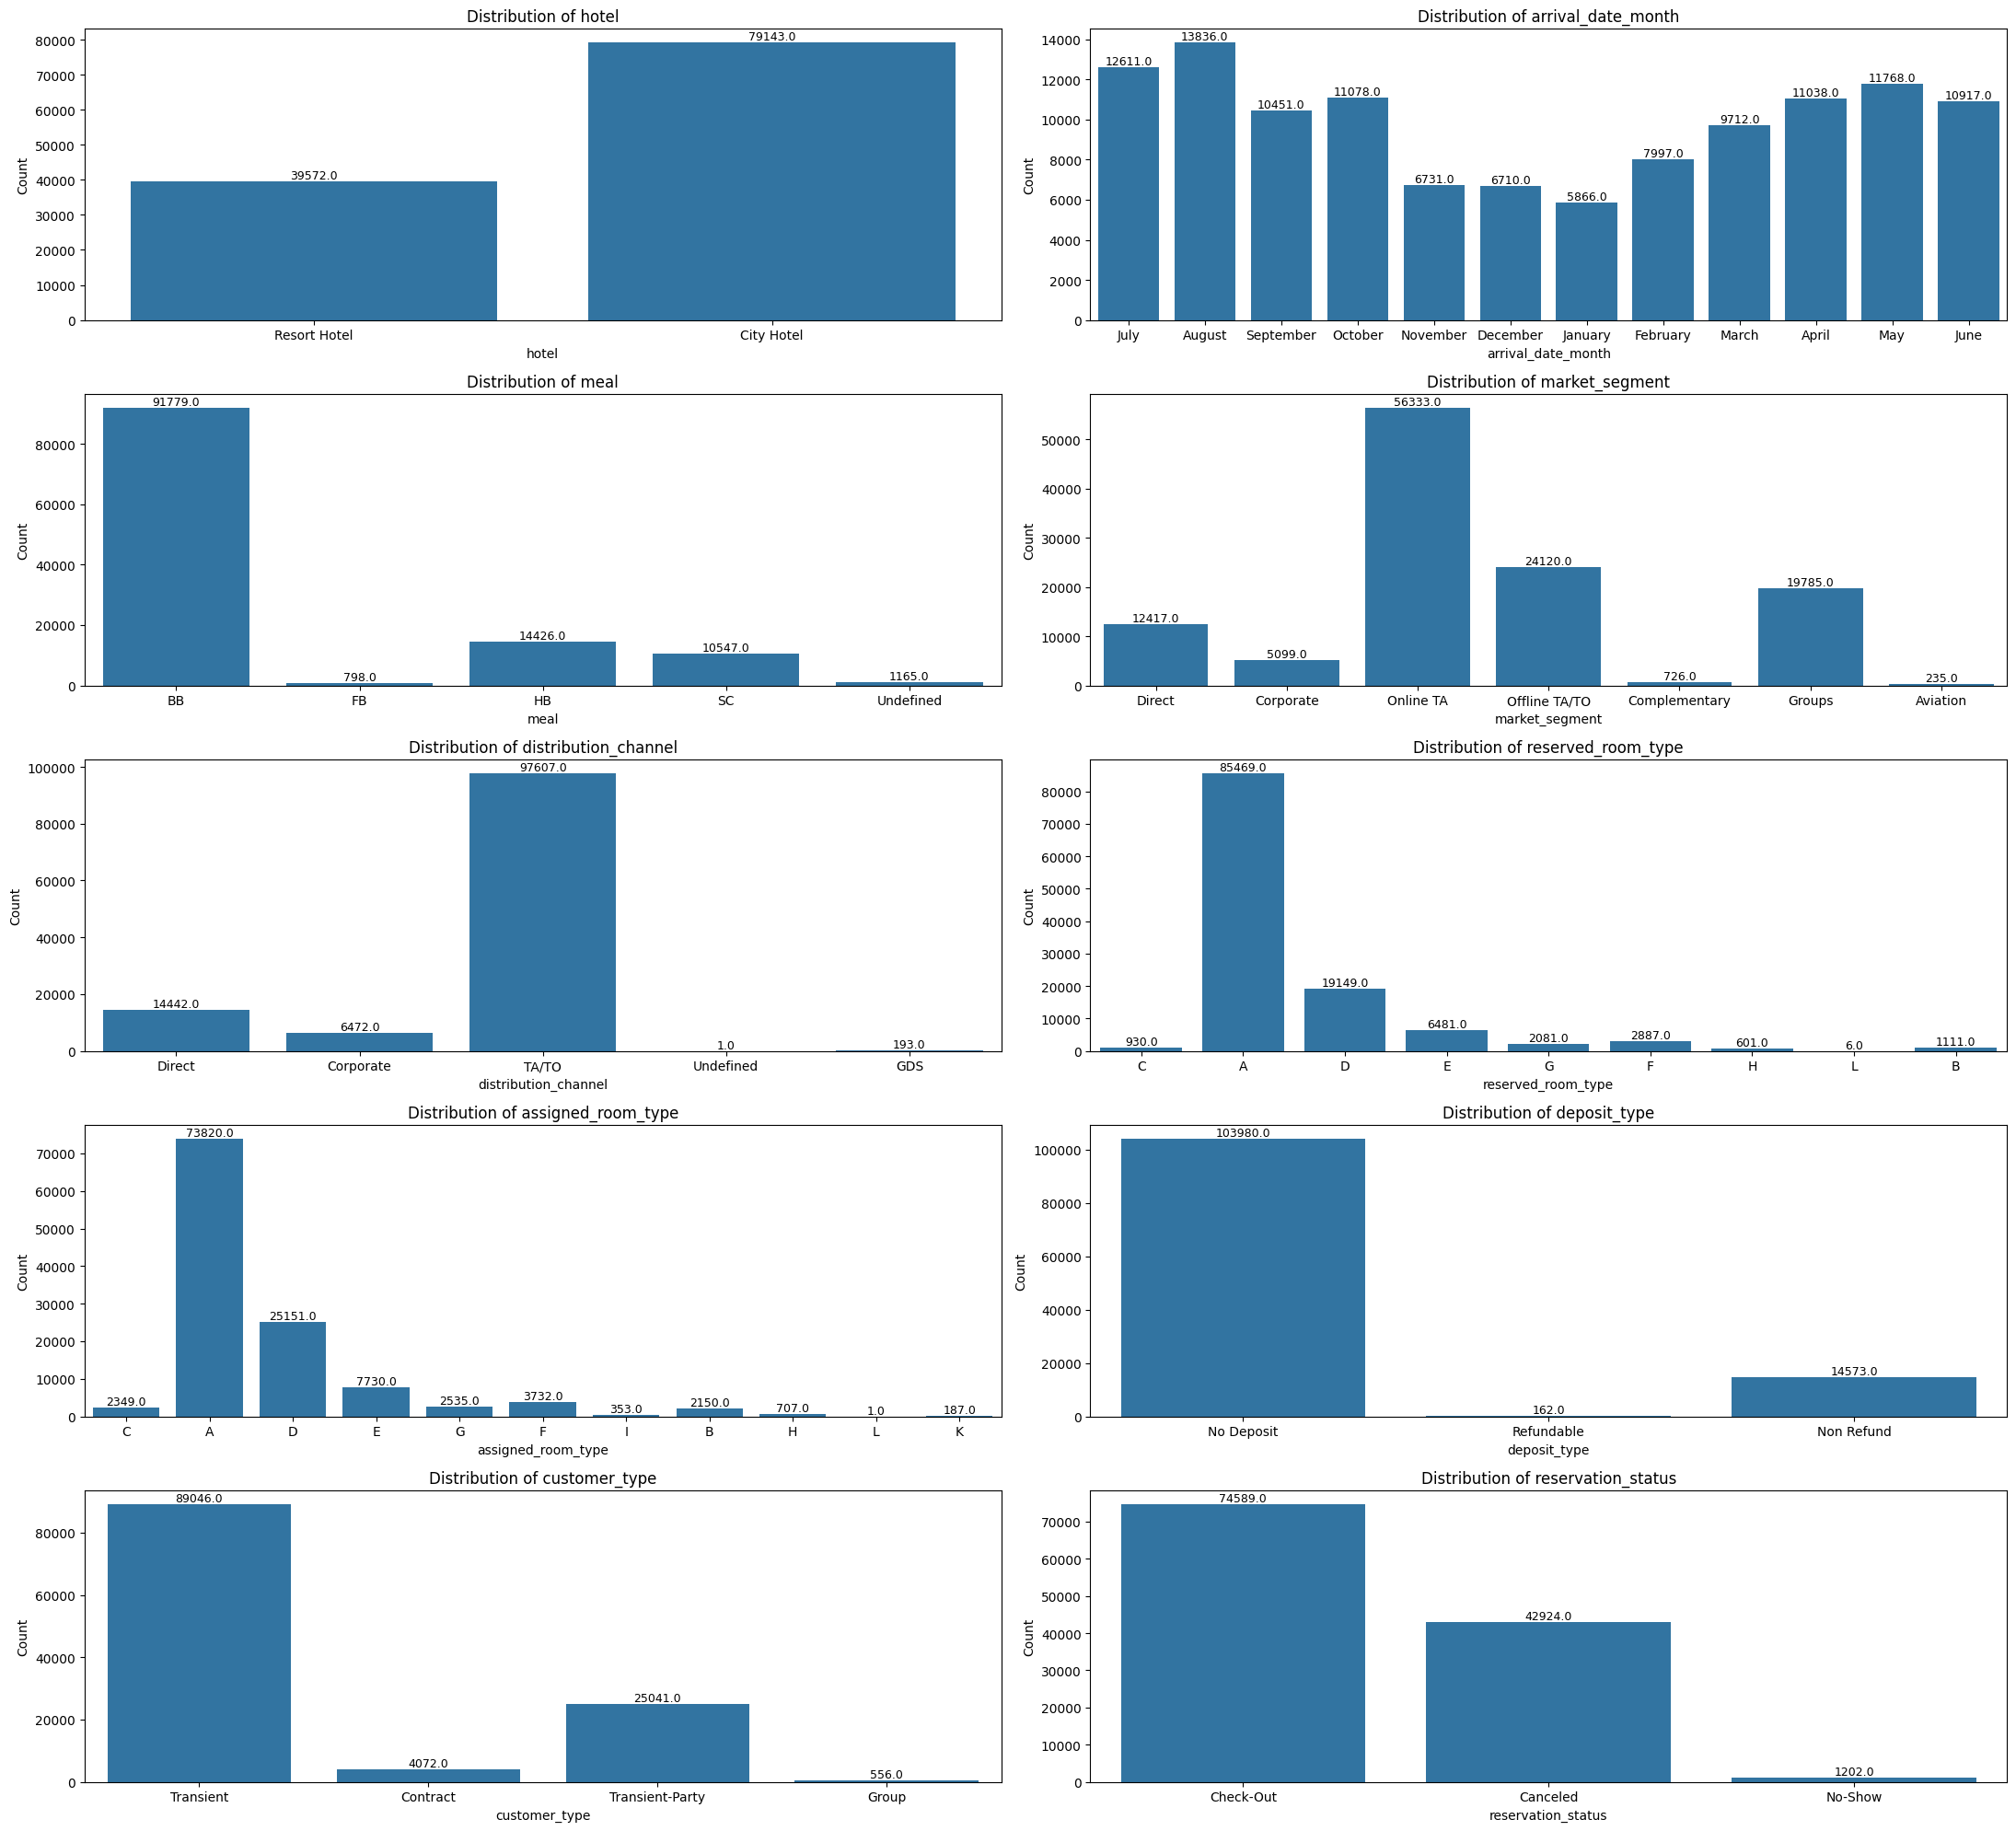

In [254]:
# Define the number of rows and columns for the subplots
n_rows = (len(categorical_features) + 1) // 2  # Calculate the number of rows needed
n_cols = 2

# Create the subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(22, 4 * n_rows))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate through the categorical features and create bar plots
for i, feature in enumerate(categorical_features):
    ax = axes[i]
    plot = sns.countplot(x=feature, data=hotel_bookings_clean, ax=ax)
    ax.set_title(f'Distribution of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')
    plt.setp(ax.get_xticklabels(), ha='center')

    # Add data labels on top of each bar
    for p in plot.patches:
        height = p.get_height()
        ax.annotate(f'{height}',
                    (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=9)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Based on univariate analysis for categorical features, we find that:
* categorical feature distributions shows that there are bins/classes with low bookings number. It is recommended to merged those bins into "Other" class to avoid sparse dummy columns and improve generalization.
* Use of one-hot encoding after class merging.
* `arrival_date_month` can be converted into numerical based on month order.

In [255]:
%%markdown
| Feature                     | Rare-Bookings Handling                         | Encoding Method               | Special Notes                               |
|-----------------------------|------------------------------------------------|-------------------------------|---------------------------------------------|
| **hotel**                   | –                                              | Binary (0/1)                  | Two balanced levels (~2 : 1 split)          |
| **arrival_date_month**      | –                                              | Convert numerical (0-12) | Captures seasonality                        |
| **meal**                    | Combine “Undefined” & “FB” into “Other”        | One-Hot                       | Four bins: BB, HB, SC, Other                |
| **market_segment**          | Merge “Complementary” & “Aviation” into “Other”| One-Hot                       |       –
| **distribution_channel**    | Merge “GDS” & “Undefined” into “Other”         | One-Hot                       | Four bins: TA/TO, Direct, Corporate, Other  |
| **reserved_room_type**      | Group all except top two (A, D) into “Other”   | One-Hot                       | Reduces sparse levels                       |
| **assigned_room_type**      | Group all except top two (A, D) into “Other”   | One-Hot                       | Check for mismacthes room type first            |
| **deposit_type**            | Merge “Refundable” into “Non Refund”/Other     | One-Hot                       | Two or three bins depending on correlation with is_canceled     |
| **customer_type**           | Merge “Group” into “Other”                     | One-Hot                       | Three bins: Transient, Transient-Party, Other |

| Feature                     | Rare-Bookings Handling                         | Encoding Method               | Special Notes                               |
|-----------------------------|------------------------------------------------|-------------------------------|---------------------------------------------|
| **hotel**                   | –                                              | Binary (0/1)                  | Two balanced levels (~2 : 1 split)          |
| **arrival_date_month**      | –                                              | Convert numerical (0-12) | Captures seasonality                        |
| **meal**                    | Combine “Undefined” & “FB” into “Other”        | One-Hot                       | Four bins: BB, HB, SC, Other                |
| **market_segment**          | Merge “Complementary” & “Aviation” into “Other”| One-Hot                       |       –
| **distribution_channel**    | Merge “GDS” & “Undefined” into “Other”         | One-Hot                       | Four bins: TA/TO, Direct, Corporate, Other  |
| **reserved_room_type**      | Group all except top two (A, D) into “Other”   | One-Hot                       | Reduces sparse levels                       |
| **assigned_room_type**      | Group all except top two (A, D) into “Other”   | One-Hot                       | Check for mismacthes room type first            |
| **deposit_type**            | Merge “Refundable” into “Non Refund”/Other     | One-Hot                       | Two or three bins depending on correlation with is_canceled     |
| **customer_type**           | Merge “Group” into “Other”                     | One-Hot                       | Three bins: Transient, Transient-Party, Other |


### Numerical Features

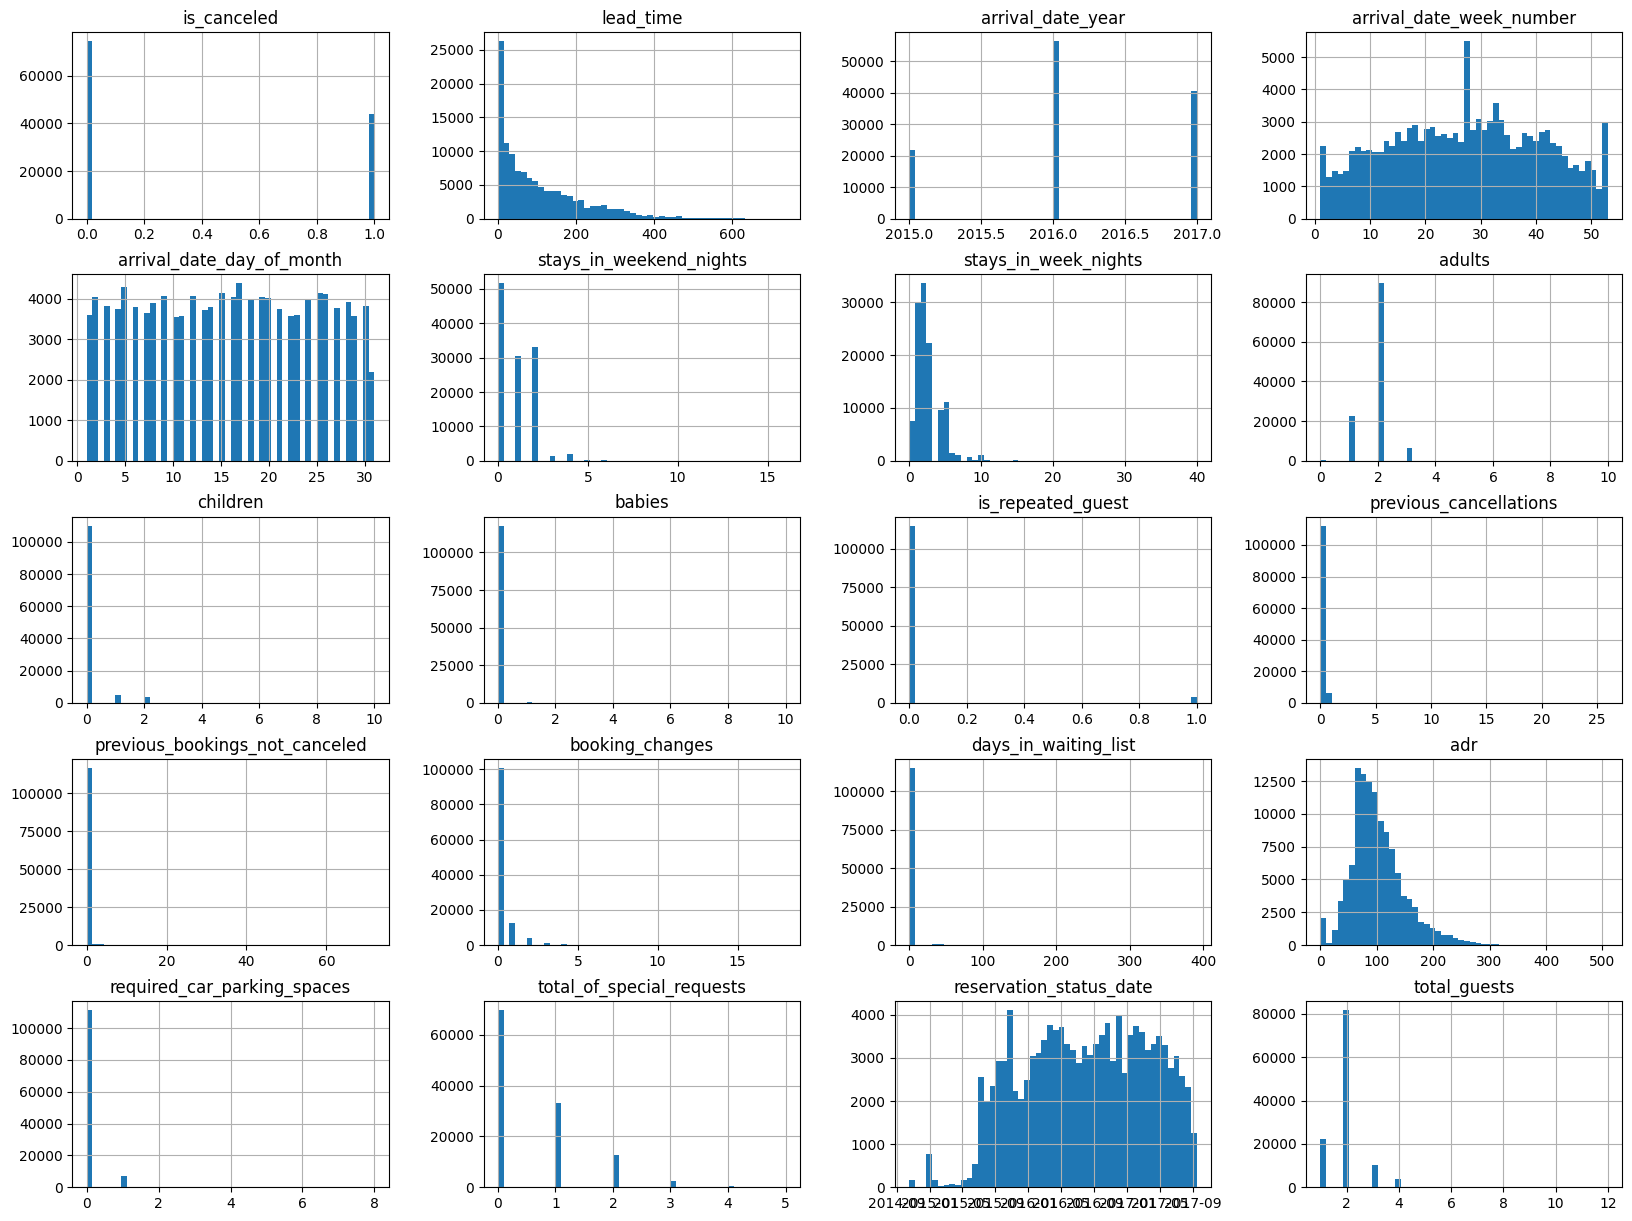

In [256]:
hotel_bookings_clean.hist(bins=50, figsize=(20,15))
plt.show()

Here is summary of univariate analysis of numerical features

In [257]:
%%markdown
| **Feature Name** | **Description** | **Data Preparation** |
|-----------------------------|------------------------------------------------|-------------------------------|
| **is_canceled** | Target variable. Shows counts of canceled (1) vs. non-canceled (0) bookings, indicating class balance. | Address class imbalance (e.g., over/under-sampling, SMOTE, class weights). Use appropriate evaluation metrics (Precision, Recall, F1, AUC). |
| **lead_time** | Right-skewed: Most bookings made close to arrival, fewer far in advance. | Requires scaling. |
| **arrival_date_year** | Shows booking counts per year (e.g., 2015, 2016, 2017). Indicates data collection period/trends. | Ensure time-aware validation if trends exist. |
| **arrival_date_week_number** | Distribution of bookings across weeks (1-52/53), showing seasonal peaks and troughs. | Key for seasonality. Consider cyclical encoding (sine/cosine transformation) |
| **arrival_date_day_of_month** | Fairly uniform distribution of bookings by day of the month (1-31). | Generally used as is. |
| **stays_in_weekend_nights** | Right-skewed: Most bookings have 0-2 weekend nights; higher counts are rare. | Consider capping rare higher values or feature engineering (e.g., binary has_weekend_stay). Scaling might be needed. |
| **stays_in_week_nights** | Right-skewed: Most stays are short (1-5 weekday nights); longer stays less common. | Consider log/sqrt transformation for skewness. Handle potential outliers (very long stays). Scaling. Feature engineer total_stay_duration. |
| **adults** | Most bookings for 1-2 adults. | Consider binning. |
| **children** | Highly right-skewed & zero-inflated: Vast majority have 0 children. | Consider binary feature (has_children). Scaling if used as is. |
| **babies** | Extremely right-skewed & zero-inflated: Overwhelmingly 0 babies. | Consider binary feature (has_babies) or assess predictive power due to rarity of non-zero values. |
| **is_repeated_guest** | Binary (0/1): Most guests are not repeated. | Use as is. Often a good predictor. |
| **previous_cancellations** | Highly right-skewed & zero-inflated: Most customers have 0 previous cancellations. | Consider log1p transformation for skewness. Capping rare high values. |
| **previous_bookings_not_canceled** | 	Highly right-skewed & zero-inflated: Most have 0 previous non-canceled bookings (new customers). | Consider log1p transformation. Capping rare high values. |
| **booking_changes** | Right-skewed & zero-inflated: Most bookings have 0 changes. | Consider log1p transformation or capping. Could create a binary "changes_made" feature. |
| **days_in_waiting_list** | Extremely right-skewed & zero-inflated: Vast majority have 0 days on waiting list. | Consider binary feature (was_on_waiting_list). Assess predictive power if non-zero instances are very rare. |
| **adr** | Somewhat right-skewed or normal-like. Potential for values near/at zero. | Requires scaling. |
| **required_car_parking_spaces** | Extremely right-skewed & zero-inflated: Overwhelmingly 0 spaces requested. | Convert to binary feature (parking_requested). Exact number beyond 0 or 1 often too sparse. |
| **total_of_special_requests** | Right-skewed: Most bookings have 0 special requests, then 1, 2, etc. | Consider capping if high numbers are rare. A binary "has_special_requests" feature might be useful. |
| **reservation_status_date** | Distribution of dates when the reservation's final status was recorded. Spans a date range. | Crucial Feature Engineering: Extract year, month, day. Calculate time differences (e.g., time from booking to this date). |
| **total_guests** | Distribution of total guests (adults+children+babies) | Often a good engineered feature. Scaling |

| **Feature Name** | **Description** | **Data Preparation** |
|-----------------------------|------------------------------------------------|-------------------------------|
| **is_canceled** | Target variable. Shows counts of canceled (1) vs. non-canceled (0) bookings, indicating class balance. | Address class imbalance (e.g., over/under-sampling, SMOTE, class weights). Use appropriate evaluation metrics (Precision, Recall, F1, AUC). |
| **lead_time** | Right-skewed: Most bookings made close to arrival, fewer far in advance. | Requires scaling. |
| **arrival_date_year** | Shows booking counts per year (e.g., 2015, 2016, 2017). Indicates data collection period/trends. | Ensure time-aware validation if trends exist. |
| **arrival_date_week_number** | Distribution of bookings across weeks (1-52/53), showing seasonal peaks and troughs. | Key for seasonality. Consider cyclical encoding (sine/cosine transformation) |
| **arrival_date_day_of_month** | Fairly uniform distribution of bookings by day of the month (1-31). | Generally used as is. |
| **stays_in_weekend_nights** | Right-skewed: Most bookings have 0-2 weekend nights; higher counts are rare. | Consider capping rare higher values or feature engineering (e.g., binary has_weekend_stay). Scaling might be needed. |
| **stays_in_week_nights** | Right-skewed: Most stays are short (1-5 weekday nights); longer stays less common. | Consider log/sqrt transformation for skewness. Handle potential outliers (very long stays). Scaling. Feature engineer total_stay_duration. |
| **adults** | Most bookings for 1-2 adults. | Consider binning. |
| **children** | Highly right-skewed & zero-inflated: Vast majority have 0 children. | Consider binary feature (has_children). Scaling if used as is. |
| **babies** | Extremely right-skewed & zero-inflated: Overwhelmingly 0 babies. | Consider binary feature (has_babies) or assess predictive power due to rarity of non-zero values. |
| **is_repeated_guest** | Binary (0/1): Most guests are not repeated. | Use as is. Often a good predictor. |
| **previous_cancellations** | Highly right-skewed & zero-inflated: Most customers have 0 previous cancellations. | Consider log1p transformation for skewness. Capping rare high values. |
| **previous_bookings_not_canceled** | 	Highly right-skewed & zero-inflated: Most have 0 previous non-canceled bookings (new customers). | Consider log1p transformation. Capping rare high values. |
| **booking_changes** | Right-skewed & zero-inflated: Most bookings have 0 changes. | Consider log1p transformation or capping. Could create a binary "changes_made" feature. |
| **days_in_waiting_list** | Extremely right-skewed & zero-inflated: Vast majority have 0 days on waiting list. | Consider binary feature (was_on_waiting_list). Assess predictive power if non-zero instances are very rare. |
| **adr** | Somewhat right-skewed or normal-like. Potential for values near/at zero. | Requires scaling. |
| **required_car_parking_spaces** | Extremely right-skewed & zero-inflated: Overwhelmingly 0 spaces requested. | Convert to binary feature (parking_requested). Exact number beyond 0 or 1 often too sparse. |
| **total_of_special_requests** | Right-skewed: Most bookings have 0 special requests, then 1, 2, etc. | Consider capping if high numbers are rare. A binary "has_special_requests" feature might be useful. |
| **reservation_status_date** | Distribution of dates when the reservation's final status was recorded. Spans a date range. | Crucial Feature Engineering: Extract year, month, day. Calculate time differences (e.g., time from booking to this date). |
| **total_guests** | Distribution of total guests (adults+children+babies) | Often a good engineered feature. Scaling |


## Multivariate Analysis

### Categorical Features

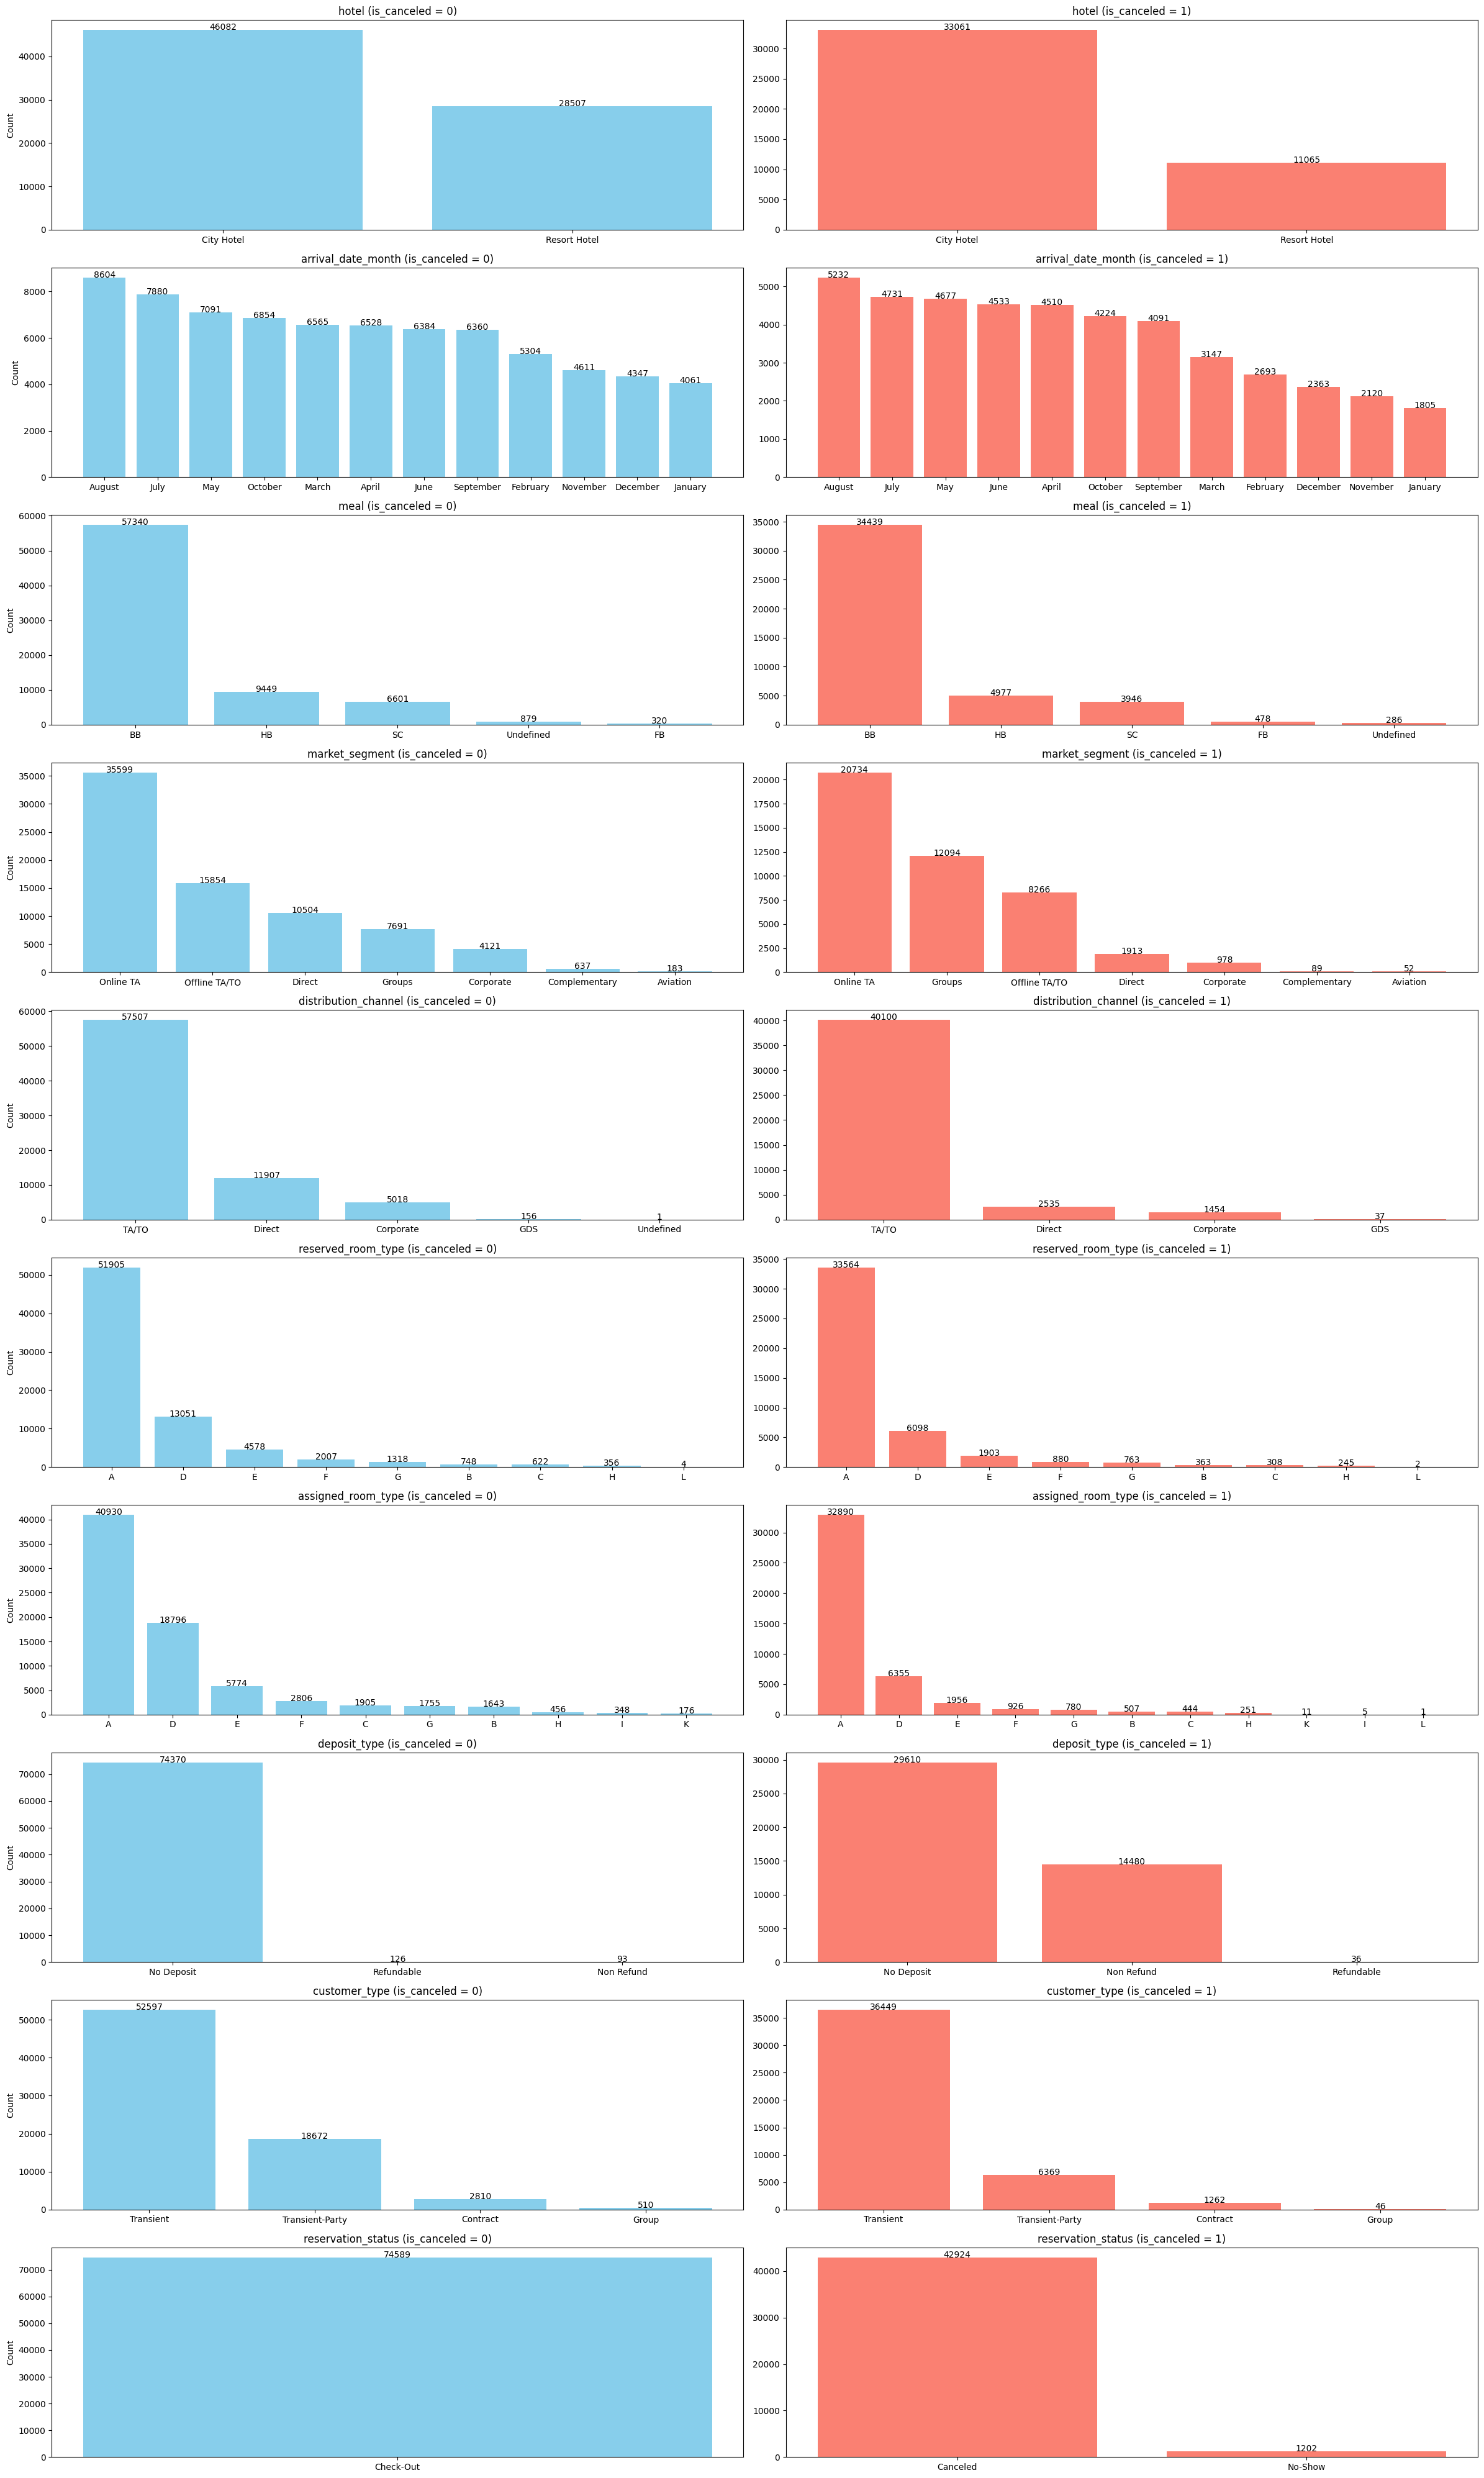

In [258]:
# Create subplots
fig, axes = plt.subplots(len(categorical_features), 2, figsize=(24, 4 * len(categorical_features)))
fig.subplots_adjust(hspace=0.5)

# Generate bar charts
for idx, col in enumerate(categorical_features):
    # First column (filtered by 'is_canceled' == 0)
    # Get counts and sort by value (largest to smallest)
    counts_no = hotel_bookings_clean[hotel_bookings_clean['is_canceled'] == 0][col].value_counts()
    # Use the index of the sorted counts for plotting
    axes[idx, 0].bar(counts_no.index.astype(str), counts_no.values, color='skyblue')
    axes[idx, 0].set_title(f'{col} (is_canceled = 0)')
    axes[idx, 0].set_ylabel('Count')
    axes[idx, 0].tick_params(axis='x')
    # Add text labels on top of bars
    for i, v in enumerate(counts_no.values):
        axes[idx, 0].text(i, v, str(v), ha='center')

    # Second column (filtered by 'is_canceled' == 1)
    # Get counts for canceled bookings and sort by value (largest to smallest)
    counts_canceled = hotel_bookings_clean[hotel_bookings_clean['is_canceled'] == 1][col].value_counts()
    # Use the index of the sorted counts for plotting
    axes[idx, 1].bar(counts_canceled.index.astype(str), counts_canceled.values, color='salmon')
    axes[idx, 1].set_title(f'{col} (is_canceled = 1)')
    axes[idx, 1].tick_params(axis='x')
    # Add text labels on top of bars
    for i, v in enumerate(counts_canceled.values):
        axes[idx, 1].text(i, v, str(v), ha='center')

plt.tight_layout()
plt.show()

Based bar graphs for each categorical features, we can find that:
* Only `deposit_type` that shows visually significant difference between canceled bookings and non-canceled bookings.
* bookings with `is_canceled` equal 1 has two `reservation_status`(Canceled or No Show). This shows redudancy between `is_canceled` and `reservation_status`

We can also evaluate the difference within categorical features with Chi-Squared test.

In [259]:
from scipy.stats import chi2_contingency

# Perform Chi-Square test for each categorical feature
for feature in categorical_features:
    contingency_table = pd.crosstab(hotel_bookings_clean['is_canceled'], hotel_bookings_clean[feature])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-Square Test for {feature}:")
    print(f"Chi2 statistic: {chi2:.3f}")
    print(f"P-value: {p:.3f}")
    print(f"Degrees of freedom: {dof}")
    if p < 0.05:
        print("Reject the null hypothesis. There is a significant difference between is_canceled = 0 and is_canceled = 1.")
    print("\n")


Chi-Square Test for hotel:
Chi2 statistic: 2154.441
P-value: 0.000
Degrees of freedom: 1
Reject the null hypothesis. There is a significant difference between is_canceled = 0 and is_canceled = 1.


Chi-Square Test for arrival_date_month:
Chi2 statistic: 554.097
P-value: 0.000
Degrees of freedom: 11
Reject the null hypothesis. There is a significant difference between is_canceled = 0 and is_canceled = 1.


Chi-Square Test for meal:
Chi2 statistic: 305.210
P-value: 0.000
Degrees of freedom: 4
Reject the null hypothesis. There is a significant difference between is_canceled = 0 and is_canceled = 1.


Chi-Square Test for market_segment:
Chi2 statistic: 8393.078
P-value: 0.000
Degrees of freedom: 6
Reject the null hypothesis. There is a significant difference between is_canceled = 0 and is_canceled = 1.


Chi-Square Test for distribution_channel:
Chi2 statistic: 3646.293
P-value: 0.000
Degrees of freedom: 4
Reject the null hypothesis. There is a significant difference between is_canceled = 

Based on chi-square test, it seems that all categorical features has significant difference if the bookings are canceled or not. Therefor, other method is needed for feature selection.

### Numerical Features

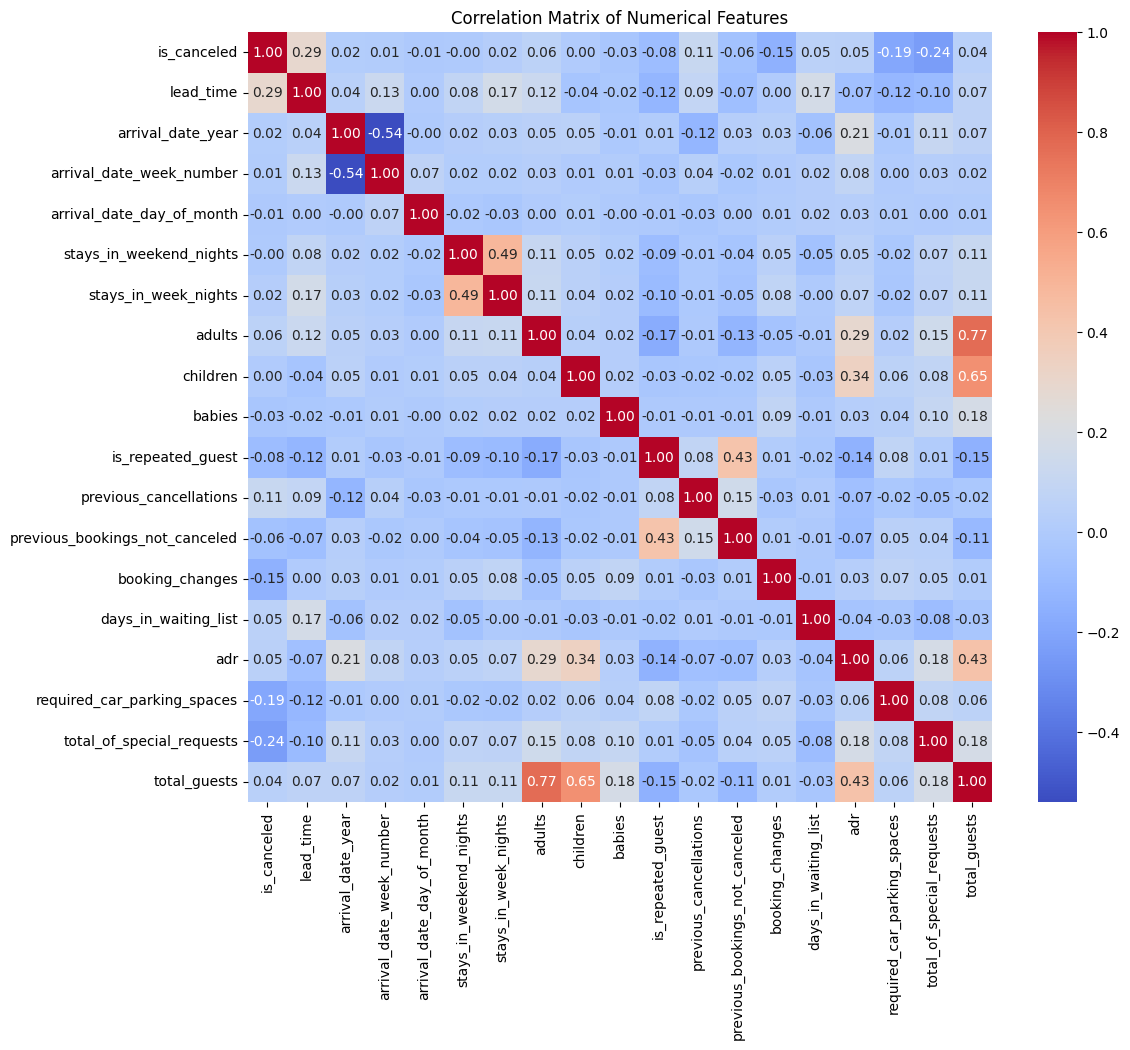

In [260]:
# Correlation Matrix
plt.figure(figsize=(12, 10))
sns.heatmap(hotel_bookings_clean[numerical_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


Because `is_canceled` can be treated as numerical_features, correlation test can be conducted to evaluate significance correlation between numerical feautres and `is_canceled`

In [261]:
from scipy.stats import pearsonr

correlation_results = []
for feature in numerical_features:
    if feature != 'is_canceled':  # Exclude the target variable from self-correlation
        correlation, p_value = pearsonr(hotel_bookings_clean['is_canceled'], hotel_bookings_clean[feature])
        if p_value < 0.05:
            significance = 'Significant'
        else:
            significance = 'Not Significant'
        correlation_results.append([feature, correlation, p_value, significance])

correlation_df = pd.DataFrame(correlation_results, columns=['Feature', 'Correlation', 'P-value', 'Significance'])
print(correlation_df)

                           Feature  Correlation        P-value  \
0                        lead_time     0.291417   0.000000e+00   
1                arrival_date_year     0.016635   9.933873e-09   
2         arrival_date_week_number     0.007545   9.330803e-03   
3        arrival_date_day_of_month    -0.005952   4.029552e-02   
4          stays_in_weekend_nights    -0.002290   4.301691e-01   
5             stays_in_week_nights     0.024727   1.584766e-17   
6                           adults     0.058846   1.491891e-91   
7                         children     0.004568   1.155424e-01   
8                           babies    -0.032598   2.760390e-29   
9                is_repeated_guest    -0.084100  2.940225e-185   
10          previous_cancellations     0.109932  7.871143e-316   
11  previous_bookings_not_canceled    -0.055488   1.346099e-81   
12                 booking_changes    -0.145109   0.000000e+00   
13            days_in_waiting_list     0.054134   9.477144e-78   
14        

Based on correlation matrix and correlation significance test (numerical features vs `is_canceled`), we can find that:

`lead_time`
* **Correlation with is_canceled:** 0.291 (P-value: 0.0000e+00, Significant). A moderate positive correlation that is highly statistically significant.
* **Impact on Feature Selection:** Strong candidate for inclusion. The significance confirms this isn't a chance finding.

`arrival_date_year`
* **Correlation with is_canceled:** 0.017 (P-value: 9.9339e-09, Significant). Although the correlation is very weak, it is statistically significant.
* **Impact on Feature Selection:** While significant, the practical impact of such a small correlation might be minimal. It could contribute minorly to the model, but its multicollinearity with `arrival_date_week_number` (-0.54) needs consideration. Could be tested, but also a candidate for dropping if it doesn't improve model performance or if simpler models are preferred.

`arrival_date_week_number`
* **Correlation with is_canceled:** 0.008 (P-value: 9.3308e-03, Significant). Very weak positive correlation, but statistically significant.
* **Impact on Feature Selection:** Similar to `arrival_date_year`, the significance of a very weak correlation means there's likely a real (but small) linear effect. Could be tested, potentially engineered (e.g., for seasonality using cyclical encoding), or dropped if it adds little value.

`arrival_date_day_of_month`
* **Correlation with is_canceled:** -0.006 (P-value: 4.0296e-02, Significant). Very weak negative correlation, statistically significant (just under the 0.05 threshold).
* **Impact on Feature Selection:** The significance suggests a real, albeit tiny, relationship. Likely has minimal predictive power on its own. Could be a candidate for dropping.

`stays_in_weekend_nights`
* **Correlation with is_canceled:** -0.002 (P-value: 0.4301691, Not Significant). Effectively no linear correlation, and this lack of correlation is confirmed by the high p-value.
* **Impact on Feature Selection:** Strong candidate for removal. It doesn't have a statistically significant linear relationship with the target.

`stays_in_week_nights`
* **Correlation with is_canceled:** 0.025 (P-value: 1.5848e-17, Significant). A weak positive correlation, but highly statistically significant.
* **Impact on Feature Selection:** While weak, its significance suggests it might carry some information. Could be combined with `stays_in_weekend_nights` (which is not significant on its own) into `total_stay_duration` and then tested. The multicollinearity (0.49) with `stays_in_weekend_nights` is also a factor.

`adults`
* **Correlation with is_canceled:** 0.059 (P-value: 1.4919e-91, Significant). Weak positive correlation, but highly statistically significant.
* **Impact on Feature Selection:** The significance is strong. However, its high correlation with `total_guests` (0.77) suggests potential redundancy if `total_guests` is used. The decision would depend on whether the individual count of adults offers more predictive nuance than the combined `total_guests`.

`children`
* **Correlation with is_canceled:** 0.005 (P-value: 0.1155424, Not Significant). Very weak positive correlation, and it is not statistically significant.
* **Impact on Feature Selection:** Strong candidate for removal, especially given its lack of significance and correlation with `total_guests` (0.68).

`babies`
* **Correlation with is_canceled:** -0.033 (P-value: 2.7604e-29, Significant). Weak negative correlation, but highly statistically significant.
* **Impact on Feature Selection:** The significance suggests it might hold some predictive value, despite the small correlation magnitude. Its correlation with `total_guests` (0.65) is also a consideration.

`is_repeated_guest`
* **Correlation with is_canceled:** -0.084 (P-value: 2.9402e-185, Significant). Weak to moderate negative correlation, highly statistically significant.
* **Impact on Feature Selection:** Good candidate for inclusion. Its correlation with `previous_bookings_not_canceled` (0.43) means you might test using one or the other if multicollinearity is an issue, but both being significant is interesting.

`previous_cancellations`
* **Correlation with is_canceled:** 0.110 (P-value: 7.8711e-316, Significant). Weak to moderate positive correlation, extremely statistically significant.
* **Impact on Feature Selection:** Good candidate for inclusion.

`previous_bookings_not_canceled`
* **Correlation with is_canceled:** -0.055 (P-value: 1.3461e-81, Significant). Weak negative correlation, highly statistically significant.
* **Impact on Feature Selection:** Likely include, despite the weaker correlation, due to high significance. Consider its relationship with `is_repeated_guest`.

`booking_changes`
* **Correlation with is_canceled:** -0.145 (P-value: 0.0000e+00, Significant). Moderate negative correlation, highly statistically significant.
* **Impact on Feature Selection:** Strong candidate for inclusion.

`days_in_waiting_list`
* **Correlation with is_canceled:** 0.054 (P-value: 9.4771e-78, Significant). Weak positive correlation, but highly statistically significant.
* **Impact on Feature Selection:** Its significance suggests it's not just noise. Could be included and its contribution evaluated.

`adr` (Average Daily Rate)
* **Correlation with is_canceled:** 0.046 (P-value: 2.6181e-57, Significant). Weak positive correlation, highly statistically significant.
* **Impact on Feature Selection:** Even though the linear correlation is weak, its high significance suggests a reliable (though small) linear relationship. It's worth keeping and exploring further, perhaps for non-linear effects or interactions, especially given its business relevance.

`required_car_parking_spaces`
* **Correlation with is_canceled:** -0.195 (P-value: 0.0000e+00, Significant). Moderate negative correlation, highly statistically significant.
* **Impact on Feature Selection:** Strong candidate for inclusion.

`total_of_special_requests`
* **Correlation with is_canceled:** -0.236 (P-value: 0.0000e+00, Significant). Moderate negative correlation, highly statistically significant.
* **Impact on Feature Selection:** Strong candidate for inclusion.

`total_guests`
* **Correlation with is_canceled:** 0.042 (P-value: 4.5291e-47, Significant). Weak positive correlation, highly statistically significant.
* **Impact on Feature Selection:** While the direct linear correlation with cancellation is weak, its significance is high. Using `total_guests` instead of `adults`, `children` (not significant), and `babies` (significant but weak correlation) could be a good strategy to handle multicollinearity and capture the overall guest count effect. The model should be tested with `total_guests` versus a combination of its significant components.

### Geolocation Feature

In [262]:
# Select relevant columns
hotel_bookings_subset = hotel_bookings_clean[['is_canceled', 'country']]

# Display the new dataframe
hotel_bookings_subset.head()

,is_canceled,country
0,0,PRT
1,0,PRT
2,0,GBR
3,0,GBR
4,0,GBR


In [263]:
def country_to_continent(country_name):
  try:
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name
  except:
    return "Unknown"

hotel_bookings_clean['continent'] = hotel_bookings_clean['country'].apply(country_to_continent)


In [264]:
continent_list = hotel_bookings_clean['continent'].unique()
continent_list


array(['Europe', 'North America', 'Asia', 'South America', 'Unknown',
       'Oceania', 'Africa'], dtype=object)

In [265]:
# Filter rows with 'Unknown' continent
unknown_continent_df = hotel_bookings_clean[hotel_bookings_clean['continent'] == 'Unknown']

# Identify countries with 'Unknown' continent
unknown_countries = unknown_continent_df['country'].unique()

print("Countries with Unknown Continent:")
unknown_countries


Countries with Unknown Continent:


array(['CN', 'TMP', 'UMI', 'ATA', 'ATF'], dtype=object)

In [266]:
# Change continent value using loc function
hotel_bookings_clean.loc[hotel_bookings_clean['country'] == 'CN', 'continent'] = 'Asia'
hotel_bookings_clean.loc[hotel_bookings_clean['country'] == 'TMP', 'continent'] = 'Asia'
hotel_bookings_clean.loc[hotel_bookings_clean['country'] == 'UMI', 'continent'] = 'North America'
hotel_bookings_clean.loc[hotel_bookings_clean['country'] == 'ATA', 'continent'] = 'South America'
hotel_bookings_clean.loc[hotel_bookings_clean['country'] == 'ATF', 'continent'] = 'South America'


In [267]:
# Filter rows with 'Unknown' continent
unknown_continent_df = hotel_bookings_clean[hotel_bookings_clean['continent'] == 'Unknown']

# Identify countries with 'Unknown' continent
unknown_countries = unknown_continent_df['country'].unique()

print("Countries with Unknown Continent:")
unknown_countries

Countries with Unknown Continent:


array([], dtype=object)

In [268]:
bookings_by_country = hotel_bookings_clean[hotel_bookings_clean['is_canceled'] == 0].groupby('country')['is_canceled'].count().reset_index()
bookings_by_country.rename(columns={'is_canceled': 'booking_count'}, inplace=True)
total_bookings = bookings_by_country['booking_count'].sum()
bookings_by_country['percentage'] = (bookings_by_country['booking_count'] / total_bookings) * 100
bookings_by_country = bookings_by_country.sort_values(by='booking_count', ascending=False)

bookings_by_country


,country,booking_count,percentage
125,PRT,20977,28.123450
57,GBR,9667,12.960356
54,FRA,8468,11.352880
50,ESP,6383,8.557562
42,DEU,6067,8.133907
...,...,...,...
138,SMR,1,0.001341
145,SYC,1,0.001341
133,SDN,1,0.001341
149,TJK,1,0.001341


In [269]:
bookings_by_country = hotel_bookings_clean[hotel_bookings_clean['is_canceled'] == 1].groupby('country')['is_canceled'].count().reset_index()
bookings_by_country.rename(columns={'is_canceled': 'booking_count'}, inplace=True)
total_bookings = bookings_by_country['booking_count'].sum()
bookings_by_country['percentage'] = (bookings_by_country['booking_count'] / total_bookings) * 100
bookings_by_country = bookings_by_country.sort_values(by='booking_count', ascending=False)

bookings_by_country


,country,booking_count,percentage
97,PRT,27490,62.298871
41,GBR,2452,5.556815
33,ESP,2177,4.933599
38,FRA,1933,4.380637
60,ITA,1333,3.020895
...,...,...,...
108,SYC,1,0.002266
117,UMI,1,0.002266
111,TMP,1,0.002266
122,VGB,1,0.002266


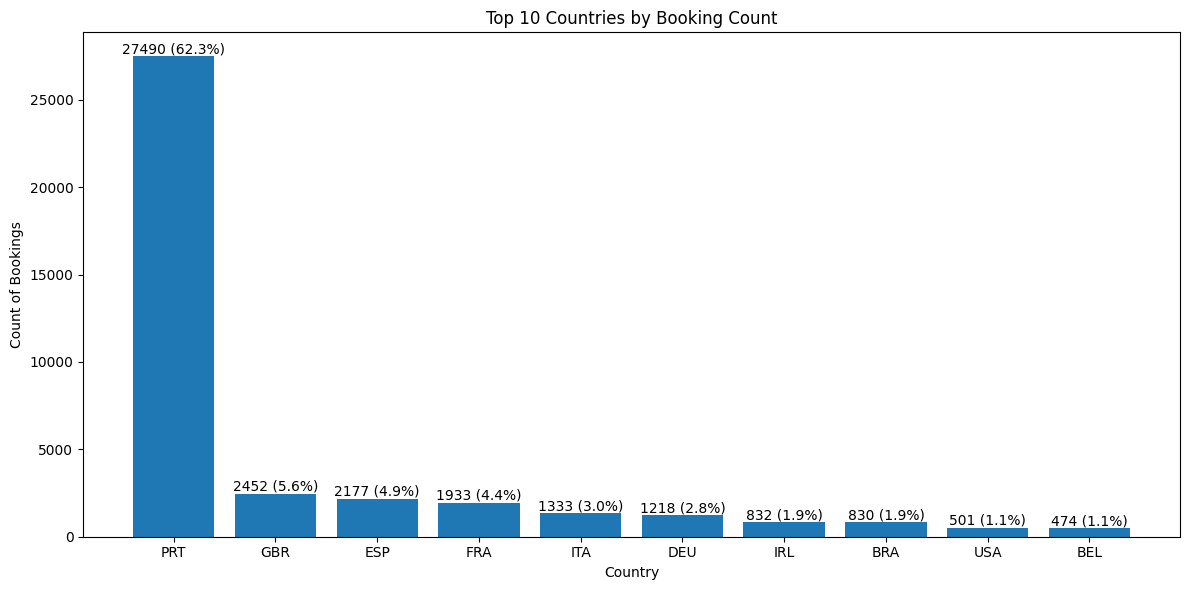

In [270]:
top_10_countries = bookings_by_country.head(10)

plt.figure(figsize=(12, 6))
bars = plt.bar(top_10_countries['country'], top_10_countries['booking_count'])
plt.xlabel("Country")
plt.ylabel("Count of Bookings")
plt.title("Top 10 Countries by Booking Count")
plt.xticks(ha="center")  # Rotate x-axis labels for better readability


# Add data labels (count and percentage) on top of each bar
for bar, count, percentage in zip(bars, top_10_countries['booking_count'], top_10_countries['percentage']):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{int(count)} ({percentage:.1f}%)', ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [271]:
bookings_by_continent = hotel_bookings_clean[hotel_bookings_clean['is_canceled'] == 0].groupby('continent')['is_canceled'].count().reset_index()
bookings_by_continent.rename(columns={'is_canceled': 'booking_count'}, inplace=True)
total_bookings = bookings_by_continent['booking_count'].sum()
bookings_by_continent['percentage'] = (bookings_by_continent['booking_count'] / total_bookings) * 100
bookings_by_continent = bookings_by_continent.sort_values(by='booking_count', ascending=False)

bookings_by_continent


,continent,booking_count,percentage
2,Europe,67067,89.915403
1,Asia,3002,4.024722
5,South America,1751,2.347531
3,North America,1743,2.336806
0,Africa,634,0.849991
4,Oceania,392,0.525547


In [272]:
bookings_by_continent = hotel_bookings_clean[hotel_bookings_clean['is_canceled'] == 1].groupby('continent')['is_canceled'].count().reset_index()
bookings_by_continent.rename(columns={'is_canceled': 'booking_count'}, inplace=True)
total_bookings = bookings_by_continent['booking_count'].sum()
bookings_by_continent['percentage'] = (bookings_by_continent['booking_count'] / total_bookings) * 100
bookings_by_continent = bookings_by_continent.sort_values(by='booking_count', ascending=False)

bookings_by_continent


,continent,booking_count,percentage
2,Europe,40581,91.966188
1,Asia,1466,3.322304
5,South America,958,2.171056
3,North America,528,1.196573
0,Africa,479,1.085528
4,Oceania,114,0.258351


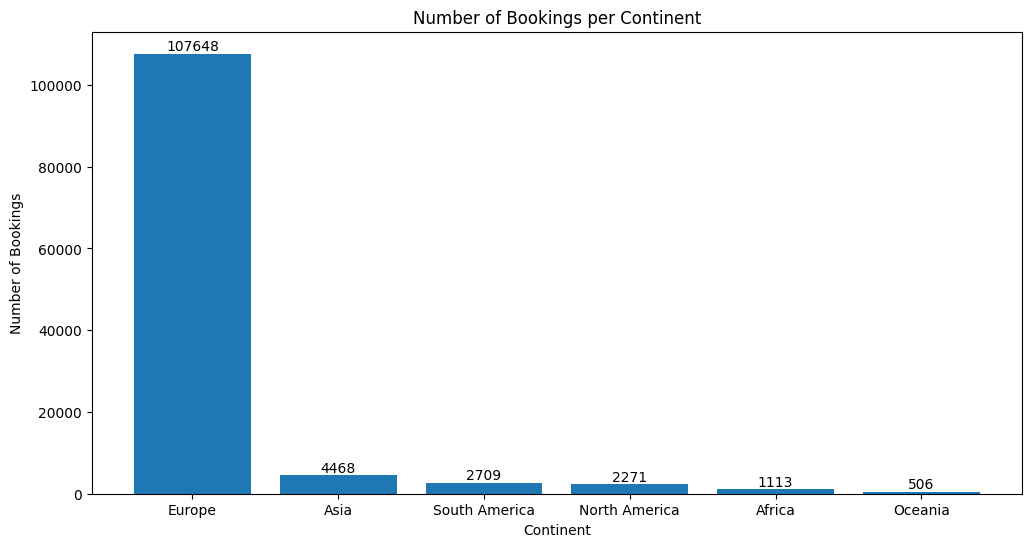

In [273]:
continent_bookings = hotel_bookings_clean['continent'].value_counts()

plt.figure(figsize=(12, 6))
bars = plt.bar(continent_bookings.index, continent_bookings.values)
plt.xlabel("Continent")
plt.ylabel("Number of Bookings")
plt.title("Number of Bookings per Continent")

# Add data labels above the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.show()


In [274]:
hotel_bookings_clean['PRT'] = 0  # Initialize the new column with 0
hotel_bookings_clean.loc[hotel_bookings_clean['country'] == 'PRT', 'PRT'] = 1


In [275]:
from scipy.stats import pearsonr

correlation, p_value = pearsonr(hotel_bookings_clean['PRT'], hotel_bookings_clean['is_canceled'])

print(f"Correlation between PRT and is_canceled: {correlation}")
print(f"P-value: {p_value}")

if p_value < 0.05:
  print("The correlation is statistically significant.")
else:
  print("The correlation is not statistically significant.")

Correlation between PRT and is_canceled: 0.3360148736686803
P-value: 0.0
The correlation is statistically significant.


## Summary of EDA

![Sample Image](https://raw.githubusercontent.com/eru2024/laskarai-mlt-predictiveanalytics/master/img/summary_eda.jpg)

# Data Preparation

Data prep1

Original Features:

* `is_canceled`
* `hotel`: binary encoding
* `arrival_date_month`: convert numerical
* `meal`: one-hot encoding (BB, HB, SC, Other)
* `market_segment`: one-hot encoding (Online TA, Offline TA/TO, Direct, Corporate, Other)
* `reserved_room_type`: one-hot encoding (A, D, Other)
*  `deposit_type`: one-hot encoding (No Deposit, Refundable, Non Refund)
* `customer_type`: one-hot encoding (Transient, Transient-Party, Other)
* `lead_time`: scaling
* `arrival_date_week_number`: as-is
* `arrival_date_day_of_month`: as-is
* `previous_cancellations`: as-is
* `previous_bookings_not_canceled`: as-is
* `booking_changes`: as-is
* `days_in_waiting_list`: as-is
* `adr`: scaling
* `required_car_parking_spaces`: as-is
* `total_of_special_requests`: as-is

New Features:
* `match_room_type`: binary encoding (0: `reserved_room_type` != `assigned_room_type`, 1: `reserved_room_type` == `assigned_room_type`)
* `has_weekend_stay`: binary encoding (0: `stays_in_weekend_nights` = 0, 1: `stays_in_weekend_nights` > 0)
* `total_stay_duration`: `stays_in_weekend_nights` + `stays_in_week_nights`
* `has_babies`: binary encoding (0: `babies` = 0, 1: `babies` > 0)
* `total_guests` (already included in `hotel_bookings_clean): as-is
* `PRT`: binary encoding (0: `country` != 'PRT', 1: `country` == 'PRT')

In [276]:
hotel_bookings_prep1 = hotel_bookings_clean[[
    'is_canceled', 'hotel', 'arrival_date_month', 'meal',
    'market_segment', 'reserved_room_type', 'deposit_type',
    'customer_type', 'lead_time', 'arrival_date_week_number',
    'arrival_date_day_of_month', 'previous_cancellations',
    'previous_bookings_not_canceled', 'booking_changes',
    'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
    'total_of_special_requests'
]].copy()

print(hotel_bookings_prep1.head())

   is_canceled         hotel arrival_date_month meal market_segment  \
0            0  Resort Hotel               July   BB         Direct   
1            0  Resort Hotel               July   BB         Direct   
2            0  Resort Hotel               July   BB         Direct   
3            0  Resort Hotel               July   BB      Corporate   
4            0  Resort Hotel               July   BB      Online TA   

  reserved_room_type deposit_type customer_type  lead_time  \
0                  C   No Deposit     Transient        342   
1                  C   No Deposit     Transient        737   
2                  A   No Deposit     Transient          7   
3                  A   No Deposit     Transient         13   
4                  A   No Deposit     Transient         14   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        2

## New Features

`match_room_type`: binary encoding (0: `reserved_room_type` != `assigned_room_type`, 1: `reserved_room_type` == `assigned_room_type`)

In [277]:
# Create the 'match_room_type' column
hotel_bookings_prep1['match_room_type'] = np.where(
    hotel_bookings_clean['reserved_room_type'] == hotel_bookings_clean['assigned_room_type'],
    1, 0
)

`has_weekend_stay`: binary encoding (0: `stays_in_weekend_nights` = 0, 1: `stays_in_weekend_nights` > 0)

In [278]:
# Create the 'has_weekend_stay' column
hotel_bookings_prep1['has_weekend_stay'] = np.where(
    hotel_bookings_clean['stays_in_weekend_nights'] > 0, 1, 0
)

`total_stay_duration`: `stays_in_weekend_nights` + `stays_in_week_nights`

In [279]:
hotel_bookings_prep1['total_stay_duration'] = (
    hotel_bookings_clean['stays_in_weekend_nights'] +
    hotel_bookings_clean['stays_in_week_nights']
)

`has_babies`: binary encoding (0: `babies` = 0, 1: `babies` > 0)

In [280]:
# `has_babies`: binary encoding (0: `babies` = 0, 1: `babies` > 0)
hotel_bookings_prep1['has_babies'] = np.where(
    hotel_bookings_clean['babies'] > 0, 1, 0
)

`total_guests` (already included in `hotel_bookings_clean): as-is

In [281]:
hotel_bookings_prep1['total_guests'] = hotel_bookings_clean['total_guests']

`PRT`: binary encoding (0: `country` != 'PRT', 1: `country` == 'PRT')

In [282]:
hotel_bookings_prep1['PRT'] = 0  # Initialize the new column with 0
hotel_bookings_prep1.loc[hotel_bookings_clean['country'] == 'PRT', 'PRT'] = 1

In [283]:
print(hotel_bookings_prep1.head())

   is_canceled         hotel arrival_date_month meal market_segment  \
0            0  Resort Hotel               July   BB         Direct   
1            0  Resort Hotel               July   BB         Direct   
2            0  Resort Hotel               July   BB         Direct   
3            0  Resort Hotel               July   BB      Corporate   
4            0  Resort Hotel               July   BB      Online TA   

  reserved_room_type deposit_type customer_type  lead_time  \
0                  C   No Deposit     Transient        342   
1                  C   No Deposit     Transient        737   
2                  A   No Deposit     Transient          7   
3                  A   No Deposit     Transient         13   
4                  A   No Deposit     Transient         14   

   arrival_date_week_number  ...  days_in_waiting_list   adr  \
0                        27  ...                     0   0.0   
1                        27  ...                     0   0.0   
2       

## Scaling

In [284]:
from scipy.stats import normaltest

# Assuming hotel_bookings_prep1 is already loaded and defined

# Perform the normality test for 'lead_time'
lead_time_stat, lead_time_p = normaltest(hotel_bookings_prep1['lead_time'])
print(f"Lead Time Normality Test:")
print(f"Statistic: {lead_time_stat:.3f}")
print(f"P-value: {lead_time_p:.3f}")

if lead_time_p < 0.05:
    print("Reject the null hypothesis: Lead time does not follow a normal distribution.")
else:
    print("Fail to reject the null hypothesis: Lead time may follow a normal distribution.")

print("\n")

# Perform the normality test for 'adr'
adr_stat, adr_p = normaltest(hotel_bookings_prep1['adr'])
print(f"ADR Normality Test:")
print(f"Statistic: {adr_stat:.3f}")
print(f"P-value: {adr_p:.3f}")

if adr_p < 0.05:
    print("Reject the null hypothesis: ADR does not follow a normal distribution.")
else:
    print("Fail to reject the null hypothesis: ADR may follow a normal distribution.")


Lead Time Normality Test:
Statistic: 25911.488
P-value: 0.000
Reject the null hypothesis: Lead time does not follow a normal distribution.


ADR Normality Test:
Statistic: 20922.237
P-value: 0.000
Reject the null hypothesis: ADR does not follow a normal distribution.


Because `lead_time` and `adr` doesn't follow normal distribution, normalization is used for scaling

In [285]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the 'lead_time' column
hotel_bookings_prep1['lead_time_norm'] = scaler.fit_transform(hotel_bookings_prep1[['lead_time']])

# Fit and transform the 'adr' column
hotel_bookings_prep1['adr_norm'] = scaler.fit_transform(hotel_bookings_prep1[['adr']])

In [286]:
print(hotel_bookings_prep1.head())

   is_canceled         hotel arrival_date_month meal market_segment  \
0            0  Resort Hotel               July   BB         Direct   
1            0  Resort Hotel               July   BB         Direct   
2            0  Resort Hotel               July   BB         Direct   
3            0  Resort Hotel               July   BB      Corporate   
4            0  Resort Hotel               July   BB      Online TA   

  reserved_room_type deposit_type customer_type  lead_time  \
0                  C   No Deposit     Transient        342   
1                  C   No Deposit     Transient        737   
2                  A   No Deposit     Transient          7   
3                  A   No Deposit     Transient         13   
4                  A   No Deposit     Transient         14   

   arrival_date_week_number  ...  required_car_parking_spaces  \
0                        27  ...                            0   
1                        27  ...                            0   
2    

## Encoding

`hotel`: binary encoding

In [287]:
# Create binary encoding for the 'hotel' column
hotel_bookings_prep1['hotel_City Hotel'] = (hotel_bookings_prep1['hotel'] == 'City Hotel').astype(int)
hotel_bookings_prep1['hotel_Resort Hotel'] = (hotel_bookings_prep1['hotel'] == 'Resort Hotel').astype(int)

hotel_bookings_prep1[['hotel','hotel_City Hotel','hotel_Resort Hotel']].head()

,hotel,hotel_City Hotel,hotel_Resort Hotel
0,Resort Hotel,0,1
1,Resort Hotel,0,1
2,Resort Hotel,0,1
3,Resort Hotel,0,1
4,Resort Hotel,0,1


`arrival_date_month`: convert numerical

In [288]:
# Create a dictionary to map month names to numbers
month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}

# Convert 'arrival_date_month' to numerical values using the mapping
hotel_bookings_prep1['arrival_date_month_number'] = hotel_bookings_prep1['arrival_date_month'].map(month_mapping)

# Display the original and new columns
print(hotel_bookings_prep1[['arrival_date_month', 'arrival_date_month_number']].head())


  arrival_date_month  arrival_date_month_number
0               July                          7
1               July                          7
2               July                          7
3               July                          7
4               July                          7


`meal`: one-hot encoding (BB, HB, SC, Others)

In [289]:
print(hotel_bookings_prep1['meal'].unique())


['BB' 'FB' 'HB' 'SC' 'Undefined']


In [290]:
# Replace 'FB' and 'Undefined' with 'Others' in the 'meal' column
hotel_bookings_prep1['meal'] = hotel_bookings_prep1['meal'].replace(['FB', 'Undefined'], 'Others')

# One-hot encode the 'meal' column
meal_dummies = pd.get_dummies(hotel_bookings_prep1['meal'], prefix='meal')
hotel_bookings_prep1 = pd.concat([hotel_bookings_prep1, meal_dummies], axis=1)
print(hotel_bookings_prep1['meal'].unique())

# Display the encoded columns along with the original 'meal' column
print(hotel_bookings_prep1[['meal', 'meal_BB', 'meal_HB', 'meal_SC', 'meal_Others']].head())

['BB' 'Others' 'HB' 'SC']
  meal  meal_BB  meal_HB  meal_SC  meal_Others
0   BB     True    False    False        False
1   BB     True    False    False        False
2   BB     True    False    False        False
3   BB     True    False    False        False
4   BB     True    False    False        False


In [291]:
# Convert encoded columns to binary
for col in ['meal_BB', 'meal_HB', 'meal_SC', 'meal_Others']:
    hotel_bookings_prep1[col] = hotel_bookings_prep1[col].astype(int)

print(hotel_bookings_prep1[['meal', 'meal_BB', 'meal_HB', 'meal_SC', 'meal_Others']].head())

  meal  meal_BB  meal_HB  meal_SC  meal_Others
0   BB        1        0        0            0
1   BB        1        0        0            0
2   BB        1        0        0            0
3   BB        1        0        0            0
4   BB        1        0        0            0


`market_segment`: one-hot encoding (Online TA, Offline TA/TO, Direct, Corporate, Others)

In [292]:
print(hotel_bookings_prep1['market_segment'].unique())

['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Aviation']


In [293]:
# Create 'Others'
hotel_bookings_prep1['market_segment'] = hotel_bookings_prep1['market_segment'].replace(['Complementary', 'Groups', 'Aviation'], 'Others')

# One-hot encode
dummies = pd.get_dummies(hotel_bookings_prep1['market_segment'], prefix='market_segment')
hotel_bookings_prep1 = pd.concat([hotel_bookings_prep1, dummies], axis=1)
print(hotel_bookings_prep1['market_segment'].unique())

# Display the encoded columns along with the original column
print(hotel_bookings_prep1[['market_segment',
                            'market_segment_Online TA',
                            'market_segment_Offline TA/TO',
                            'market_segment_Direct',
                            'market_segment_Corporate',
                            'market_segment_Others']].head())

# Convert encoded columns to binary
for col in ['market_segment_Online TA',
                            'market_segment_Offline TA/TO',
                            'market_segment_Direct',
                            'market_segment_Corporate',
                            'market_segment_Others']:
    hotel_bookings_prep1[col] = hotel_bookings_prep1[col].astype(int)

print(hotel_bookings_prep1[['market_segment',
                            'market_segment_Online TA',
                            'market_segment_Offline TA/TO',
                            'market_segment_Direct',
                            'market_segment_Corporate',
                            'market_segment_Others']].head())

['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Others']
  market_segment  market_segment_Online TA  market_segment_Offline TA/TO  \
0         Direct                     False                         False   
1         Direct                     False                         False   
2         Direct                     False                         False   
3      Corporate                     False                         False   
4      Online TA                      True                         False   

   market_segment_Direct  market_segment_Corporate  market_segment_Others  
0                   True                     False                  False  
1                   True                     False                  False  
2                   True                     False                  False  
3                  False                      True                  False  
4                  False                     False                  False  
  market_segment  market_se

`reserved_room_type`: one-hot encoding (A, D, Othesr)

In [294]:
print(hotel_bookings_prep1['reserved_room_type'].unique())

['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'B']


In [295]:
# Replace values other than 'A' and 'D' with 'Others'
hotel_bookings_prep1['reserved_room_type'] = hotel_bookings_prep1['reserved_room_type'].apply(lambda x: x if x in ['A', 'D'] else 'Others')

# One-hot encode the 'reserved_room_type' column
reserved_room_type_dummies = pd.get_dummies(hotel_bookings_prep1['reserved_room_type'], prefix='reserved_room_type')
hotel_bookings_prep1 = pd.concat([hotel_bookings_prep1, reserved_room_type_dummies], axis=1)

print(hotel_bookings_prep1[['reserved_room_type', 'reserved_room_type_A', 'reserved_room_type_D', 'reserved_room_type_Others']].head())


  reserved_room_type  reserved_room_type_A  reserved_room_type_D  \
0             Others                 False                 False   
1             Others                 False                 False   
2                  A                  True                 False   
3                  A                  True                 False   
4                  A                  True                 False   

   reserved_room_type_Others  
0                       True  
1                       True  
2                      False  
3                      False  
4                      False  


In [296]:
# Convert encoded columns to binary
for col in ['reserved_room_type_A', 'reserved_room_type_D', 'reserved_room_type_Others']:
    hotel_bookings_prep1[col] = hotel_bookings_prep1[col].astype(int)

print(hotel_bookings_prep1[['reserved_room_type', 'reserved_room_type_A', 'reserved_room_type_D', 'reserved_room_type_Others']].head())

  reserved_room_type  reserved_room_type_A  reserved_room_type_D  \
0             Others                     0                     0   
1             Others                     0                     0   
2                  A                     1                     0   
3                  A                     1                     0   
4                  A                     1                     0   

   reserved_room_type_Others  
0                          1  
1                          1  
2                          0  
3                          0  
4                          0  


`deposit_type`: one-hot encoding (No Deposit, Refundable, Non Refund)

In [297]:
print(hotel_bookings_prep1['deposit_type'].unique())

['No Deposit' 'Refundable' 'Non Refund']


In [298]:
# One-hot encode the 'deposit_type' column
deposit_type_dummies = pd.get_dummies(hotel_bookings_prep1['deposit_type'], prefix='deposit_type')
hotel_bookings_prep1 = pd.concat([hotel_bookings_prep1, deposit_type_dummies], axis=1)

print(hotel_bookings_prep1[['deposit_type', 'deposit_type_No Deposit', 'deposit_type_Non Refund', 'deposit_type_Refundable']].head())

  deposit_type  deposit_type_No Deposit  deposit_type_Non Refund  \
0   No Deposit                     True                    False   
1   No Deposit                     True                    False   
2   No Deposit                     True                    False   
3   No Deposit                     True                    False   
4   No Deposit                     True                    False   

   deposit_type_Refundable  
0                    False  
1                    False  
2                    False  
3                    False  
4                    False  


In [299]:
# Convert encoded columns to binary
for col in ['deposit_type_No Deposit', 'deposit_type_Non Refund', 'deposit_type_Refundable']:
    hotel_bookings_prep1[col] = hotel_bookings_prep1[col].astype(int)

print(hotel_bookings_prep1[['deposit_type', 'deposit_type_No Deposit', 'deposit_type_Non Refund', 'deposit_type_Refundable']].head())

  deposit_type  deposit_type_No Deposit  deposit_type_Non Refund  \
0   No Deposit                        1                        0   
1   No Deposit                        1                        0   
2   No Deposit                        1                        0   
3   No Deposit                        1                        0   
4   No Deposit                        1                        0   

   deposit_type_Refundable  
0                        0  
1                        0  
2                        0  
3                        0  
4                        0  


`customer_type`: one-hot encoding (Transient, Transient-Party, Others)

In [300]:
print(hotel_bookings_prep1['customer_type'].unique())

['Transient' 'Contract' 'Transient-Party' 'Group']


In [301]:
# Replace values other than 'Transient' and 'Transient-Party' with 'Others'
hotel_bookings_prep1['customer_type'] = hotel_bookings_prep1['customer_type'].apply(lambda x: x if x in ['Transient', 'Transient-Party'] else 'Others')

# One-hot encode the 'customer_type' column
customer_type_dummies = pd.get_dummies(hotel_bookings_prep1['customer_type'], prefix='customer_type')
hotel_bookings_prep1 = pd.concat([hotel_bookings_prep1, customer_type_dummies], axis=1)

print(hotel_bookings_prep1[['customer_type', 'customer_type_Transient', 'customer_type_Transient-Party', 'customer_type_Others']].head())


  customer_type  customer_type_Transient  customer_type_Transient-Party  \
0     Transient                     True                          False   
1     Transient                     True                          False   
2     Transient                     True                          False   
3     Transient                     True                          False   
4     Transient                     True                          False   

   customer_type_Others  
0                 False  
1                 False  
2                 False  
3                 False  
4                 False  


In [302]:
# Convert encoded columns to binary
for col in ['customer_type_Transient', 'customer_type_Transient-Party', 'customer_type_Others']:
    hotel_bookings_prep1[col] = hotel_bookings_prep1[col].astype(int)

print(hotel_bookings_prep1[['customer_type', 'customer_type_Transient', 'customer_type_Transient-Party', 'customer_type_Others']].head())

  customer_type  customer_type_Transient  customer_type_Transient-Party  \
0     Transient                        1                              0   
1     Transient                        1                              0   
2     Transient                        1                              0   
3     Transient                        1                              0   
4     Transient                        1                              0   

   customer_type_Others  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  


Preparing new dataframe for modeling

In [303]:
# Drop object data type columns
object_columns = hotel_bookings_prep1.select_dtypes(include=['object']).columns
hotel_bookings_prep1 = hotel_bookings_prep1.drop(columns=object_columns)
hotel_bookings_prep1 = hotel_bookings_prep1.drop(columns=['lead_time','adr'])

dataframes = {'hotel_bookings_prep1': hotel_bookings_prep1}

summary_dataset = get_dataframe_summary(dataframes)
summary_dataset

,DataFrame Name,Column Name,dtype,Minimum Value,Maximum Value,Mean Value,Median Value,Standard Deviation,Number of Rows,Number of Missing Values,Number of Unique Values,Number of Duplicated Values
0,hotel_bookings_prep1,is_canceled,int64,0.0,1.0,0.371697,0.000000,0.483260,118715,0,2,118713
1,hotel_bookings_prep1,arrival_date_week_number,int64,1.0,53.0,27.164074,28.000000,13.586502,118715,0,53,118662
2,hotel_bookings_prep1,arrival_date_day_of_month,int64,1.0,31.0,15.801457,16.000000,8.780360,118715,0,31,118684
3,hotel_bookings_prep1,previous_cancellations,int64,0.0,26.0,0.087217,0.000000,0.846465,118715,0,15,118700
4,hotel_bookings_prep1,previous_bookings_not_canceled,int64,0.0,72.0,0.131609,0.000000,1.485371,118715,0,73,118642
5,hotel_bookings_prep1,booking_changes,int64,0.0,18.0,0.218827,0.000000,0.638920,118715,0,19,118696
6,hotel_bookings_prep1,days_in_waiting_list,int64,0.0,391.0,2.330893,0.000000,17.634013,118715,0,127,118588
7,hotel_bookings_prep1,required_car_parking_spaces,int64,0.0,8.0,0.061921,0.000000,0.244243,118715,0,5,118710
8,hotel_bookings_prep1,total_of_special_requests,int64,0.0,5.0,0.571840,0.000000,0.792760,118715,0,6,118709
9,hotel_bookings_prep1,match_room_type,int64,0.0,1.0,0.877210,1.000000,0.328197,118715,0,2,118713


# Model Development

## SMOTE - Data Splitting

Applies SMOTE to balance the `is_canceled` target variable by oversampling the minority class.

In [304]:
from imblearn.over_sampling import SMOTE

# Separate features (X) and target (y)
X = hotel_bookings_prep1.drop('is_canceled', axis=1)
y = hotel_bookings_prep1['is_canceled']

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to oversample the minority class
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new DataFrame with the resampled data
hotel_bookings_prep1_resampled = pd.DataFrame(X_resampled, columns=X.columns)
hotel_bookings_prep1_resampled['is_canceled'] = y_resampled

Splits the resampled dataset into training (90%) and testing (10%) sets.

In [305]:
from sklearn.model_selection import train_test_split

X_train_80, X_test_80, y_train_80, y_test_80 = train_test_split(X_resampled, y_resampled, test_size = 0.1, random_state = 123)

print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train_80)}')
print(f'Total # of sample in test dataset: {len(X_test_80)}')

Total # of sample in whole dataset: 118715
Total # of sample in train dataset: 134260
Total # of sample in test dataset: 14918


## Logistic Regression

Accuracy: 0.8228985118648613
              precision    recall  f1-score   support

           0       0.81      0.84      0.83      7498
           1       0.83      0.80      0.82      7420

    accuracy                           0.82     14918
   macro avg       0.82      0.82      0.82     14918
weighted avg       0.82      0.82      0.82     14918



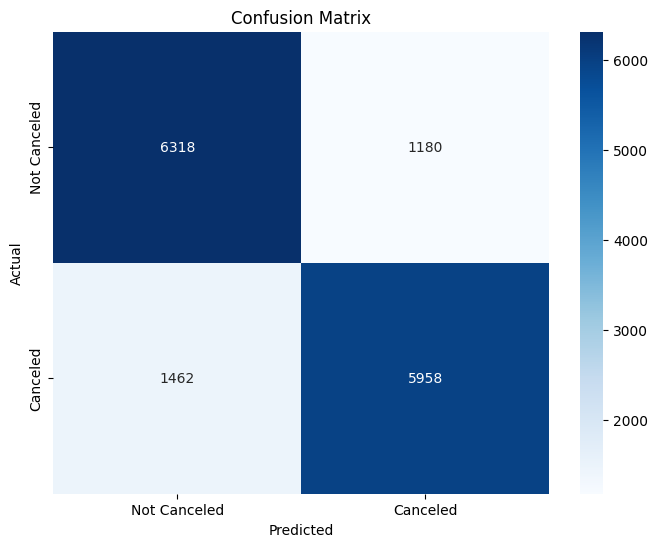

In [306]:
logreg_model = make_pipeline(StandardScaler(), LogisticRegression())
logreg_model.fit(X_train_80, y_train_80)

# Make predictions on the test set
y_pred_80 = logreg_model.predict(X_test_80)

# Evaluate the model
accuracy = accuracy_score(y_test_80, y_pred_80)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test_80, y_pred_80))

# Create and display the confusion matrix
cm = confusion_matrix(y_test_80, y_pred_80)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Canceled', 'Canceled'],
            yticklabels=['Not Canceled', 'Canceled'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## K-Nearest Neighbor (KNN)

Accuracy: 0.8458238369754659
              precision    recall  f1-score   support

           0       0.88      0.81      0.84      7498
           1       0.82      0.89      0.85      7420

    accuracy                           0.85     14918
   macro avg       0.85      0.85      0.85     14918
weighted avg       0.85      0.85      0.85     14918



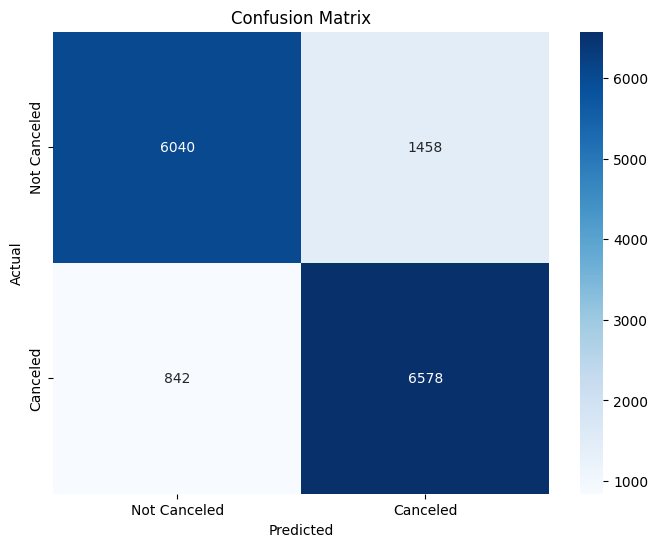

In [307]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors=3)
knn_model.fit(X_train_80, y_train_80)

# Make predictions on the test set
y_pred_80 = knn_model.predict(X_test_80)

y_pred_80 = np.where(y_pred_80 >= 0.5, 1, 0)

# Evaluate the model
accuracy = accuracy_score(y_test_80, y_pred_80)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test_80, y_pred_80))

# Create and display the confusion matrix
cm = confusion_matrix(y_test_80, y_pred_80)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Canceled', 'Canceled'],
            yticklabels=['Not Canceled', 'Canceled'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Decision Tree Classifier

Accuracy: 0.8679447647137686
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      7498
           1       0.87      0.87      0.87      7420

    accuracy                           0.87     14918
   macro avg       0.87      0.87      0.87     14918
weighted avg       0.87      0.87      0.87     14918



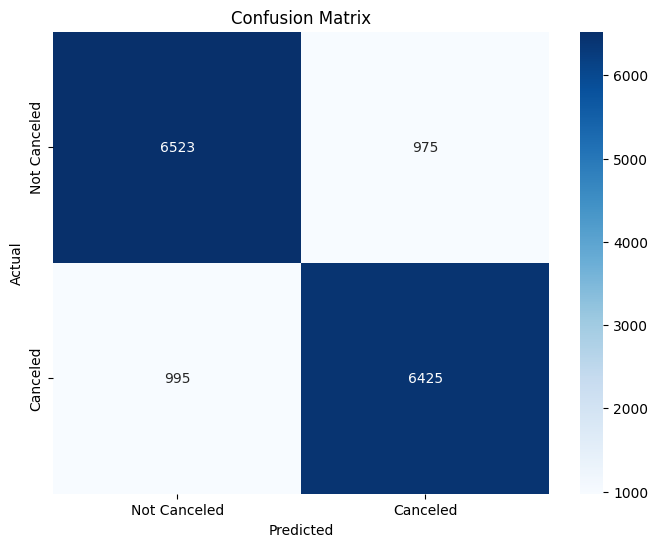

In [308]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_80, y_train_80)

# Make predictions on the test set
y_pred_80 = dt_classifier.predict(X_test_80)

# Evaluate the model
accuracy = accuracy_score(y_test_80, y_pred_80)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test_80, y_pred_80))

# Create and display the confusion matrix
cm = confusion_matrix(y_test_80, y_pred_80)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Canceled', 'Canceled'],
            yticklabels=['Not Canceled', 'Canceled'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Random Forest

Accuracy: 0.9067569379273361
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      7498
           1       0.91      0.90      0.91      7420

    accuracy                           0.91     14918
   macro avg       0.91      0.91      0.91     14918
weighted avg       0.91      0.91      0.91     14918



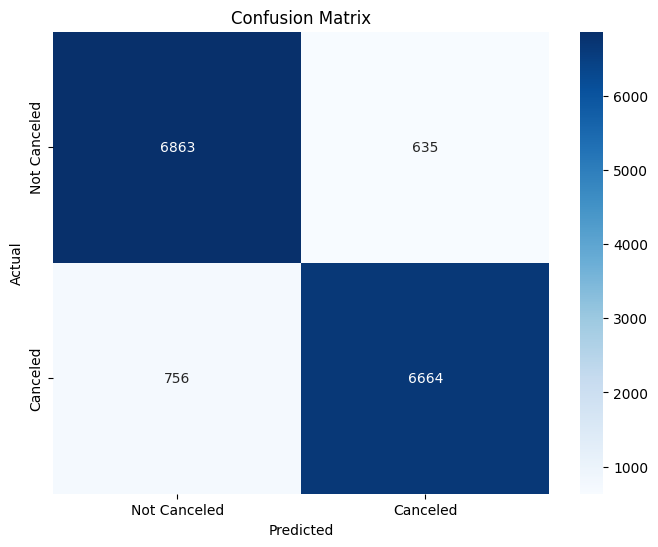

In [309]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_80, y_train_80)

# Make predictions on the test set
y_pred_80 = rf_classifier.predict(X_test_80)

# Evaluate the model
accuracy = accuracy_score(y_test_80, y_pred_80)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test_80, y_pred_80))

# Create and display the confusion matrix
cm = confusion_matrix(y_test_80, y_pred_80)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Canceled', 'Canceled'],
            yticklabels=['Not Canceled', 'Canceled'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Adaptive Boosting Classifier

Accuracy: 0.8165973991151629
              precision    recall  f1-score   support

           0       0.79      0.86      0.82      7498
           1       0.84      0.78      0.81      7420

    accuracy                           0.82     14918
   macro avg       0.82      0.82      0.82     14918
weighted avg       0.82      0.82      0.82     14918



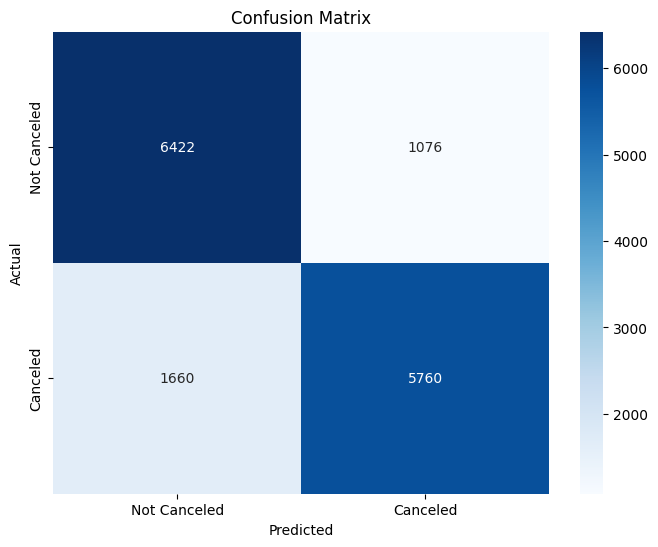

In [310]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize and train the AdaBoost Classifier
ada_classifier = AdaBoostClassifier(random_state=42)
ada_classifier.fit(X_train_80, y_train_80)

# Make predictions on the test set
y_pred_80 = ada_classifier.predict(X_test_80)

# Evaluate the model
accuracy = accuracy_score(y_test_80, y_pred_80)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test_80, y_pred_80))

# Create and display the confusion matrix
cm = confusion_matrix(y_test_80, y_pred_80)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Canceled', 'Canceled'],
            yticklabels=['Not Canceled', 'Canceled'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## Gradient Boosting Classifier

Accuracy: 0.8459579032041828
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      7498
           1       0.87      0.82      0.84      7420

    accuracy                           0.85     14918
   macro avg       0.85      0.85      0.85     14918
weighted avg       0.85      0.85      0.85     14918



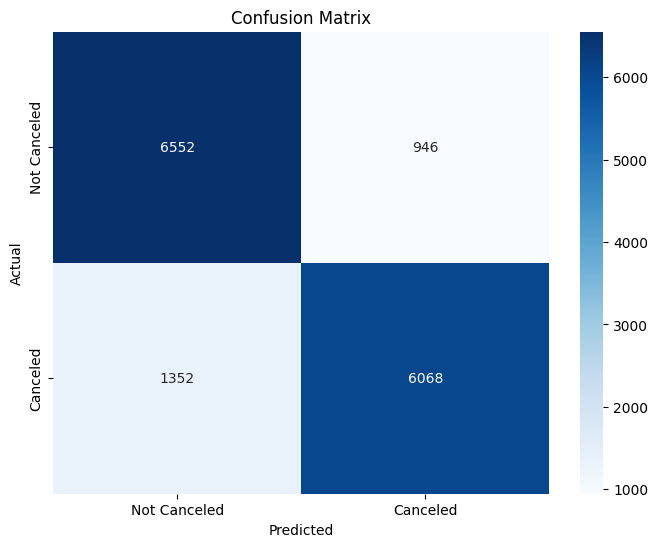

In [311]:
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_train_80, y_train_80)

# Make predictions on the test set
y_pred_80 = gb_classifier.predict(X_test_80)

# Evaluate the model
accuracy = accuracy_score(y_test_80, y_pred_80)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test_80, y_pred_80))

# Create and display the confusion matrix
cm = confusion_matrix(y_test_80, y_pred_80)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Canceled', 'Canceled'],
            yticklabels=['Not Canceled', 'Canceled'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Model Evaluation

## Best Algorithm

In [312]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming y_test_80 and y_pred_80 are defined for each model as in the provided code

models = {
    'Logistic Regression': logreg_model,
    'KNN': knn_model,
    'Decision Tree': dt_classifier,
    'Random Forest': rf_classifier,
    'AdaBoost': ada_classifier,
    'Gradient Boosting': gb_classifier
}

results = []
for model_name, model in models.items():
    if model_name == 'KNN':
        y_pred_80 = model.predict(X_test_80)
        y_pred_80 = np.where(y_pred_80 >= 0.5, 1, 0)
    else:
        y_pred_80 = model.predict(X_test_80)

    accuracy = accuracy_score(y_test_80, y_pred_80)
    precision = precision_score(y_test_80, y_pred_80)
    recall = recall_score(y_test_80, y_pred_80)
    f1 = f1_score(y_test_80, y_pred_80)

    results.append([model_name, accuracy, precision, recall, f1])

summary_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
summary_df


,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.822899,0.834688,0.802965,0.818519
1,KNN,0.845824,0.818566,0.886523,0.851190
2,Decision Tree,0.867945,0.868243,0.865903,0.867072
3,Random Forest,0.906757,0.913002,0.898113,0.905496
4,AdaBoost,0.816597,0.842598,0.776280,0.808081
5,Gradient Boosting,0.845958,0.865127,0.817790,0.840793


Comparing six models using Accuracy, Precision, Recall, and F1-Score, Random Forest achieves the highest performance across all metrics, especially F1-Score (0.905), making it the best model for predicting booking cancellations.


## Feature Importance

Calculates feature importance using permutation importance on the trained Random Forest model, based on F1-Score. Results are sorted by mean importance to identify the most influential features.

In [313]:
from sklearn.inspection import permutation_importance

result = permutation_importance(rf_classifier, X_test_80, y_test_80, scoring='f1', n_repeats=10, random_state=42)
perm_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance Mean': result.importances_mean,
    'Importance Std': result.importances_std
}).sort_values(by='Importance Mean', ascending=False)

print(perm_importance)

                           Feature  Importance Mean  Importance Std
13                             PRT         0.073583        0.001823
14                  lead_time_norm         0.071465        0.002175
7        total_of_special_requests         0.068611        0.002435
15                        adr_norm         0.056767        0.001475
25    market_segment_Offline TA/TO         0.033684        0.001872
8                  match_room_type         0.028342        0.001146
26        market_segment_Online TA         0.026975        0.001291
6      required_car_parking_spaces         0.018803        0.000728
36   customer_type_Transient-Party         0.017788        0.000621
4                  booking_changes         0.015642        0.001194
2           previous_cancellations         0.015218        0.000560
16                hotel_City Hotel         0.015202        0.001091
0         arrival_date_week_number         0.014562        0.001133
24           market_segment_Direct         0.013

It is clear that top 3 features are `PRT`, `lead_time`, and ` total_of_special_requests` based on importance mean.

Adds predicted cancellation probabilities and class labels from the trained Random Forest model to `hotel_bookings_pred` using feature set `X`.

In [314]:
hotel_bookings_pred = hotel_bookings_clean.copy()

In [320]:
# Predict using the trained RandomForestClassifier
hotel_bookings_pred['prob_canceled'] = rf_classifier.predict_proba(X)[:, 1]
hotel_bookings_pred['pred_canceled'] = rf_classifier.predict(X)

### `PRT`

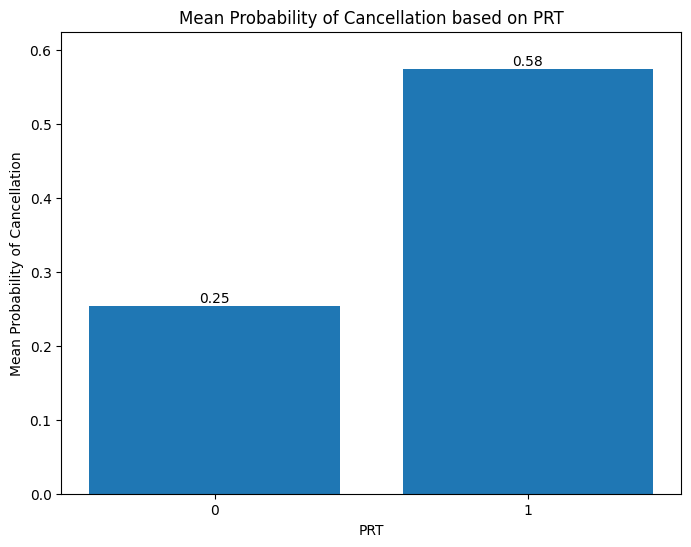

In [321]:
# Calculate the mean prob_canceled for each PRT group
mean_prob_canceled_by_prt = hotel_bookings_pred.groupby('PRT')['prob_canceled'].mean()

# Create the bar graph
plt.figure(figsize=(8, 6))
bars = plt.bar(mean_prob_canceled_by_prt.index, mean_prob_canceled_by_prt.values)

# Add data labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # x-position
        height,                            # y-position
        f"{height:.2f}",                   # label text
        ha='center', va='bottom'           # alignment
    )

plt.xlabel("PRT")
plt.ylabel("Mean Probability of Cancellation")
plt.title("Mean Probability of Cancellation based on PRT")
plt.xticks(mean_prob_canceled_by_prt.index)
plt.ylim(0, max(mean_prob_canceled_by_prt.values) + 0.05)  # Add space above bars for labels
plt.show()

This binary feature (1: country is Portugal, 0: other) had the highest importance mean at 0.0736. Analysis of booking behavior shows a clear pattern: bookings from Portugal have a significantly higher cancellation probability (57.5%) compared to those from other countries (25.4%). This strong contrast in behavior makes the PRT feature a key predictor in the model.

### `lead_time`

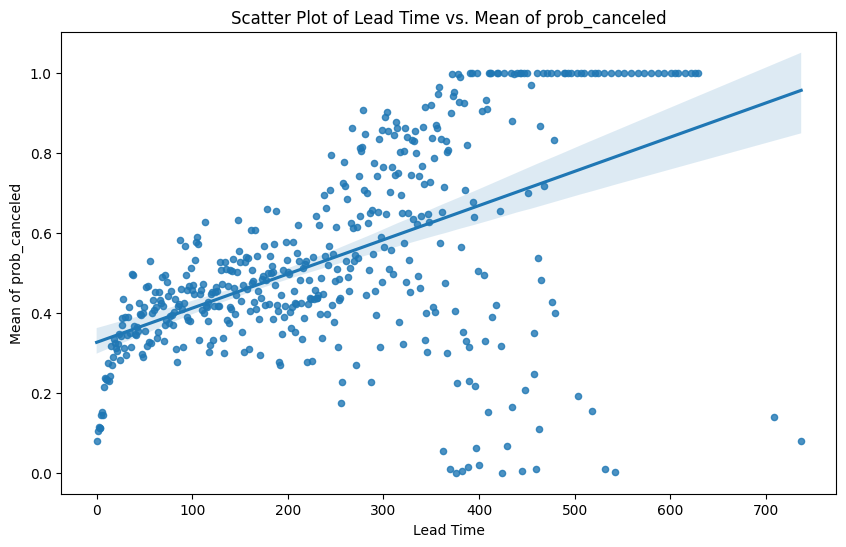

In [319]:
# Calculate the mean of prob_canceled for each lead_time
mean_prob_canceled_by_lead_time = hotel_bookings_pred.groupby('lead_time')['prob_canceled'].mean().reset_index()

# Create the scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='lead_time', y='prob_canceled', data=mean_prob_canceled_by_lead_time, scatter_kws={'s': 20})
plt.xlabel('Lead Time')
plt.ylabel('Mean of prob_canceled')
plt.title('Scatter Plot of Lead Time vs. Mean of prob_canceled')
plt.show()


With an importance mean of 0.0715, the normalized lead time between the booking date and check-in date proves to be a strong indicator of cancellation likelihood. The longer the lead time, the higher the chance of cancellation. Cancellations increase steadily from 37.3% in the 4–104 day interval to 81.8% in the 504–604 day range, eventually reaching 100% in the longest lead time range (604–704 days). This trend highlights the risk of long-term bookings and emphasizes the need for closer monitoring or flexible policies for such cases.

### `total_of_special_requests`

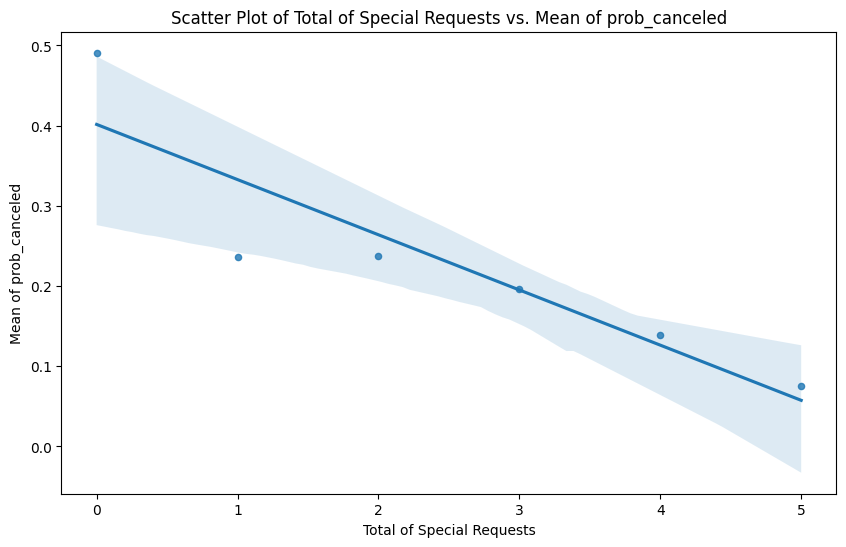

In [318]:
# Calculate the mean of prob_canceled
mean_prob_canceled_by_total_of_special_requests = hotel_bookings_pred.groupby('total_of_special_requests')['prob_canceled'].mean().reset_index()

# Create the scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='total_of_special_requests', y='prob_canceled', data=mean_prob_canceled_by_total_of_special_requests, scatter_kws={'s': 20})
plt.xlabel('Total of Special Requests')
plt.ylabel('Mean of prob_canceled')
plt.title('Scatter Plot of Total of Special Requests vs. Mean of prob_canceled')
plt.show()


This feature, with an importance mean of 0.0686, reflects the level of customer engagement through requests made during booking. The data shows that bookings with no special requests have a cancellation rate of 49.1%, while those with five special requests drop sharply to only 7.6%. This pattern suggests that guests who invest effort in customizing their stay are more likely to follow through with their bookings.